<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Unsupervised_learning_Zomato_Restaurant_Clustering_and_sentiment_Analysis/blob/main/Unsupervised_learning_Zomato_Restaurant_Clustering_and_sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato Restaurant Clustering and Sentiment Analysis**



##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [772]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import numpy as np
import seaborn as sns
from scipy.stats import *
import math
import matplotlib.gridspec as gridspec
import warnings


#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

from sklearn.preprocessing import StandardScaler


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Dataset Loading

In [773]:

# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [774]:
# Importing Data
path='/content/drive/MyDrive/Unsupervised learning project/'
reviews_df=pd.read_csv(path + 'Zomato Restaurant reviews.csv')
Metadata_df=pd.read_csv(path + 'Zomato Restaurant names and Metadata.csv')

### Dataset First View

In [775]:
#First View of Restaurant names and Metadata
Metadata_df

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [776]:
#First view of reviews dataframe
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review Rating  \
0     The ambience was good, food was quite good . h...      5   
1     Ambience is too good for a pleasant evening. S...      5   
2     A must try.. great food great ambience. Thnx f...      5   
3     Soumen das and Arun was a great guy. Only beca...      5   
4     Food is good.we ordered Kodi drumsticks and ba...      5   
...                                                 ...    ...   
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
0           1 Review , 2 Followers  5/25/2019 15:54         0  
1          3 Reviews , 2 Followers  5/25/2019 14:20         0  
2          2 Reviews , 3 Followers  5/24/2019 22:54         0  
3            1 Review , 1 Follower  5/24/2019 22:11         0  
4          3 Reviews , 2 Followers  5/24/2019 21:37         0  
...                            ...              ...       ...  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6  

[10000 rows x 7 columns]

In [777]:
reviews_df[reviews_df['Restaurant']=='Beyond Flavours']

Restaurant              Reviewer  \
0   Beyond Flavours     Rusha Chakraborty   
1   Beyond Flavours  Anusha Tirumalaneedi   
2   Beyond Flavours       Ashok Shekhawat   
3   Beyond Flavours        Swapnil Sarkar   
4   Beyond Flavours                Dileep   
..              ...                   ...   
95  Beyond Flavours          Gaurav Saini   
96  Beyond Flavours          Kailash Sain   
97  Beyond Flavours          KAILASH SAIN   
98  Beyond Flavours     Yaswanth Chowdary   
99  Beyond Flavours                Aditya   

                                               Review Rating  \
0   The ambience was good, food was quite good . h...      5   
1   Ambience is too good for a pleasant evening. S...      5   
2   A must try.. great food great ambience. Thnx f...      5   
3   Soumen das and Arun was a great guy. Only beca...      5   
4   Food is good.we ordered Kodi drumsticks and ba...      5   
..                                                ...    ...   
95  Was there for office lunch outing. Rating woul...      3   
96  I really enjoyed the follows....\nThe entrance...      5   
97  I came first time in this restaurant.\nThe ent...      5   
98  Pathetic and horrible experience\nAmbience and...      2   
99  Ahmed was serving us. Polite and very cooperat...      4   

                    Metadata             Time  Pictures  
0     1 Review , 2 Followers  5/25/2019 15:54         0  
1    3 Reviews , 2 Followers  5/25/2019 14:20         0  
2    2 Reviews , 3 Followers  5/24/2019 22:54         0  
3      1 Review , 1 Follower  5/24/2019 22:11         0  
4    3 Reviews , 2 Followers  5/24/2019 21:37         0  
..                       ...              ...       ...  
95   5 Reviews , 7 Followers   5/4/2019 16:56         0  
96                  1 Review   5/3/2019 20:10         0  
97                  1 Review   5/3/2019 20:06         0  
98  4 Reviews , 56 Followers   5/3/2019 11:40         0  
99  4 Reviews , 46 Followers   5/2/2019 23:28         1  

[100 rows x 7 columns]

In [778]:
pd.DataFrame(reviews_df['Restaurant'].value_counts().sort_values(ascending=False))

Restaurant
Beyond Flavours                         100
Absolute Sizzlers                       100
Flechazo                                100
Shah Ghouse Hotel & Restaurant          100
Over The Moon Brew Company              100
...                                     ...
Hyderabadi Daawat                       100
Zega - Sheraton Hyderabad Hotel         100
Triptify                                100
Squeeze @ The Lime                      100
Chinese Pavilion                        100

[100 rows x 1 columns]

### Dataset Rows & Columns count

In [779]:
# Dataset Rows(Observation) & Columns count(Feature)
print(f'Number of observation and feature for restaurant names and Metadata: {Metadata_df.shape}')
print(f'Number of observation and feature for reviews: {reviews_df.shape}')

Number of observation and feature for restaurant names and Metadata: (105, 6)
Number of observation and feature for reviews: (10000, 7)


### Dataset Information

In [780]:
Metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [781]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [782]:
# Checking for duplicates
duplicate_rows=Metadata_df[Metadata_df.duplicated()]

In [783]:
# Dataset Duplicate Value Count
len(duplicate_rows)

0

In [784]:
# Checking for duplicates
duplicate_rows=reviews_df[reviews_df.duplicated()]

In [785]:
# Dataset Duplicate Value Count
len(duplicate_rows)

36

In [786]:
duplicate_rows

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

There is no important inforamtion in duplicated rows so I am dropping the duplicated rows from reviews dataset.

In [787]:
# Droping the duplicated rows
reviews_df=reviews_df.drop_duplicates()
reviews_df.shape

(9964, 7)

#### Missing Values/Null Values

In [788]:
# Checking null values
Metadata_df.isna().sum().sort_values(ascending=False)

Collections    54
Timings         1
Name            0
Links           0
Cost            0
Cuisines        0
dtype: int64

In [789]:


#Visualizing missing values in Collections column
Metadata_df[Metadata_df['Collections'].isna()]

Name  \
7                   Shah Ghouse Spl Shawarma   
15                                       KFC   
16                       NorFest - The Dhaba   
17                          Hotel Zara Hi-Fi   
23                                      Amul   
25                                Tiki Shack   
28                           Behrouz Biryani   
29                        Hunger Maggi Point   
30                                Pot Pourri   
33                                Club Rogue   
35                 Green Bawarchi Restaurant   
37                       Kritunga Restaurant   
39                             Deli 9 Bistro   
40                               Frio Bistro   
41                            Karachi Bakery   
42                              Karachi Cafe   
45                               Owm Nom Nom   
48                            Udipi's Upahar   
50                             Gal Punjab Di   
51                 Hitech Bawarchi Food Zone   
52                         Biryanis And More   
54                            Asian Meal Box   
57                              Being Hungry   
59                                 KS Bakers   
62     Shree Santosh Dhaba Family Restaurant   
63                              Dine O China   
64                           Hyderabad Chefs   
66                              Aromas@11SIX   
70                Urban Asia - Kitchen & Bar   
71                         Eat India Company   
73                               Driven Cafe   
74                                    Faasos   
75                    Royal Spicy Restaurant   
76             The Old Madras Baking Company   
79                              Olive Garden   
81                                  Delhi-39   
82                        Al Saba Restaurant   
83                                      GD's   
84                                   T Grill   
85                             Momos Delight   
86                        The Chocolate Room   
88                            Domino's Pizza   
89                       Mohammedia Shawarma   
91   Cascade - Radisson Hyderabad Hitec City   
93                  Zing's Northeast Kitchen   
94                            Dunkin' Donuts   
95                                Desi Bytes   
97           Zega - Sheraton Hyderabad Hotel   
98                                  Triptify   
99                          Chinese Pavilion   
100                                IndiBlaze   
101                             Sweet Basket   
102                         Angaara Counts 3   
103                              Wich Please   

                                                 Links   Cost Collections  \
7    https://www.zomato.com/hyderabad/shah-ghouse-s...    300         NaN   
15     https://www.zomato.com/hyderabad/kfc-gachibowli    500         NaN   
16   https://www.zomato.com/hyderabad/norfest-the-d...    550         NaN   
17   https://www.zomato.com/hyderabad/hotel-zara-ga...    400         NaN   
23    https://www.zomato.com/hyderabad/amul-gachibowli    150         NaN   
25   https://www.zomato.com/hyderabad/tiki-shack-ga...  1,000         NaN   
28   https://www.zomato.com/hyderabad/behrouz-birya...    600         NaN   
29   https://www.zomato.com/hyderabad/hunger-maggi-...    200         NaN   
30   https://www.zomato.com/hyderabad/pot-pourri-ga...    900         NaN   
33   https://www.zomato.com/hyderabad/club-rogue-ga...    900         NaN   
35   https://www.zomato.com/hyderabad/green-bawarch...    700         NaN   
37   https://www.zomato.com/hyderabad/kritunga-rest...    500         NaN   
39   https://www.zomato.com/hyderabad/deli-9-bistro...    700         NaN   
40   https://www.zomato.com/hyderabad/frio-bistro-g...  1,200         NaN   
41   https://www.zomato.com/hyderabad/karachi-baker...    500         NaN   
42   https://www.zomato.com/hyderabad/karachi-cafe-...    600         NaN   
45   https://www.zomato.com/hyderabad/owm-nom-nom-g...    900         NaN   
48   https://

In [790]:
#visualizing the missing values in Timings column
Metadata_df[Metadata_df['Timings'].isna()]

Name                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [791]:


# Checking null values
reviews_df.isna().sum().sort_values(ascending=False)

Review        9
Reviewer      2
Rating        2
Metadata      2
Time          2
Restaurant    0
Pictures      0
dtype: int64

In [792]:

#visualizing missing values in review column
reviews_df[reviews_df['Review'].isna()]

Restaurant                Reviewer Review Rating  \
2360                 Amul        Lakshmi Narayana    NaN      5   
5799         Being Hungry                   Surya    NaN      5   
6449      Hyderabad Chefs          Madhurimanne97    NaN      5   
6489      Hyderabad Chefs                  Harsha    NaN      5   
7954         Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228   Al Saba Restaurant                  Suresh    NaN      5   
8777  American Wild Wings                     NaN    NaN    NaN   
8844       Domino's Pizza             Sayan Gupta    NaN      5   
9085         Arena Eleven                     NaN    NaN    NaN   

                     Metadata             Time  Pictures  
2360                0 Reviews  7/29/2018 18:00         0  
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0  
6449                 1 Review  7/23/2018 16:29         0  
6489                 1 Review   7/8/2018 21:19         0  
7954    1 Review , 1 Follower   8/9/2018 23:25         0  
8228                 1 Review  7/20/2018 22:42         0  
8777                      NaN              NaN         0  
8844  2 Reviews , 2 Followers   8/9/2018 21:41         0  
9085                      NaN              NaN         0

In [793]:


#visualizing the missing values in columns Reviewer, rating ,metadata and time
nullreviews=reviews_df[reviews_df['Reviewer'].isna()]

In [794]:


nullreviews

Restaurant Reviewer Review Rating Metadata Time  Pictures
8777  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9085         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

In [795]:
#dropping data with null values in all rows except restaurant name 
reviews_df.drop(nullreviews.index,inplace=True)

In [796]:
reviews_df.shape

(9962, 7)

### What did you know about your datasets?

There are two data sets Metadata dataset and reviews data set received from zomato. 
For Metadata Dataset:

I have found that the Metadata datset contains 105 rows and 6 columns. I have found there are no duplicate rows in the dataset. There are 54 rows with missing values present in columns Collection and 1 row with missing values in timings. I have not replaced or removed any missing values.

For Reviews dataset

I have found that the reviews dataset has 10000 rows and 7 columns. I have found that there are 36 duplicate rows. I have dropped all duplicate rows. I also found that there are 9 missing values of reviewer and 2 missing values in each column of review, reviewer, rating, Metadata and Time. I have observed that for the two rows, American Wild Wings and Arena Eleven has no reviews, ratings,metadata and we dont have the timings of the hotel. so I have dropperd these two rows. The final reviews dataset has 9962 rows and 7 columns.   

## ***2. Understanding Your Variables***

In [797]:
Metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [798]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [799]:
# Dataset Describe Metadata
Metadata_df.describe()

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [800]:


# Dataset Describe reviews of object data type
reviews_df.describe(include='object')

Restaurant     Reviewer Review Rating  Metadata             Time
count              9962         9962   9955   9962      9962             9962
unique              100         7446   9364     10      2477             9782
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34
freq                100           13    237   3832       919                3

In [801]:
# Dataset Describe reviews of numerical datatype
reviews_df.describe()

Pictures
count  9962.000000
mean      0.751456
std       2.574863
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      64.000000

### Variables Description 


**Zomato Restaurant names and Metadata**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

**Zomato Restaurant Reviews**

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

In [802]:
# Check Unique Values for each variable for Metadata
for i in Metadata_df.columns.tolist():
  print("No. of unique values in ",i,"is",Metadata_df[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [803]:
# Check Unique Values for each variable for reviews
for i in reviews_df.columns.tolist():
  print("No. of unique values in ",i,"is",reviews_df[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [804]:

#creating copy of both the data
metadata = Metadata_df.copy()
review = reviews_df.copy()

In [805]:
#before changing data type for cost checking values
metadata['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

We can see that comma "," present in the cost column is making the values in the column as object data type. So I have decided to convert object data type to integer data type

In [806]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
metadata['Cost'] = metadata['Cost'].str.replace(",","").astype('int64')

In [807]:
#Checking the values of changes made
metadata['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750,  250])

In [808]:
#assigning restaurant name to index
metadata.index=metadata['Name']

In [809]:
#dropping Name column
metadata.drop(['Name'],axis=1)

Links  \
Name                                                                                        
Beyond Flavours                         https://www.zomato.com/hyderabad/beyond-flavou...   
Paradise                                https://www.zomato.com/hyderabad/paradise-gach...   
Flechazo                                https://www.zomato.com/hyderabad/flechazo-gach...   
Shah Ghouse Hotel & Restaurant          https://www.zomato.com/hyderabad/shah-ghouse-h...   
Over The Moon Brew Company              https://www.zomato.com/hyderabad/over-the-moon...   
...                                                                                   ...   
IndiBlaze                               https://www.zomato.com/hyderabad/indiblaze-gac...   
Sweet Basket                            https://www.zomato.com/hyderabad/sweet-basket-...   
Angaara Counts 3                        https://www.zomato.com/hyderabad/angaara-count...   
Wich Please                             https://www.zomato.com/hyderabad/wich-please-1...   
Republic Of Noodles - Lemon Tree Hotel  https://www.zomato.com/hyderabad/republic-of-n...   

                                        Cost  \
Name                                           
Beyond Flavours                          800   
Paradise                                 800   
Flechazo                                1300   
Shah Ghouse Hotel & Restaurant           800   
Over The Moon Brew Company              1200   
...                                      ...   
IndiBlaze                                600   
Sweet Basket                             200   
Angaara Counts 3                         500   
Wich Please                              250   
Republic Of Noodles - Lemon Tree Hotel  1700   

                                                                              Collections  \
Name                                                                                        
Beyond Flavours                         Food Hygiene Rated Restaurants in Hyderabad, C...   
Paradise                                                              Hyderabad's Hottest   
Flechazo                                               Great Buffets, Hyderabad's Hottest   
Shah Ghouse Hotel & Restaurant                                     Late Night Restaurants   
Over The Moon Brew Company              Best Bars & Pubs, Food Hygiene Rated Restauran...   
...                                                                                   ...   
IndiBlaze                                                                             NaN   
Sweet Basket                                                                          NaN   
Angaara Counts 3                                                                      NaN   
Wich Please                                                                           NaN   
Republic Of Noodles - Lemon Tree Hotel                               Pan-Asian Delicacies   

                                                                                 Cuisines  \
Name                                                                                        
Beyond Flavours                         Chinese, Continental, Kebab, European, South I...   
Paradise                                                   Biryani, North Indian, Chinese   
Flechazo                                     Asian, Mediterranean, North Indian, Desserts   
Shah Ghouse Hotel & Restaurant          Biryani, North Indian, Chinese, Seafood, Bever...   
Over The Moon Brew Company              Asian, Continental, North Indian, Chinese, Med...   
...                                                                                   ...   
IndiBlaze                                                                Fast Food, Salad   
Sweet Basket                                                               Bakery, Mithai   
Angaara Counts 3                                           North Indian, Biryani, Chinese   
Wich Please     

In [810]:
# replace NaN values with Blank spaces
metadata=metadata.replace(np.nan, '')

In [811]:
# spliting the cusines and storing in list 
cuisine_value_list = metadata.Cuisines.str.split(', ')
#Cusine_value_list dataset view
cuisine_value_list

Name
Beyond Flavours                           [Chinese, Continental, Kebab, European, South ...
Paradise                                                   [Biryani, North Indian, Chinese]
Flechazo                                     [Asian, Mediterranean, North Indian, Desserts]
Shah Ghouse Hotel & Restaurant            [Biryani, North Indian, Chinese, Seafood, Beve...
Over The Moon Brew Company                [Asian, Continental, North Indian, Chinese, Me...
                                                                ...                        
IndiBlaze                                                                [Fast Food, Salad]
Sweet Basket                                                               [Bakery, Mithai]
Angaara Counts 3                                           [North Indian, Biryani, Chinese]
Wich Please                                                                     [Fast Food]
Republic Of Noodles - Lemon Tree Hotel                    [Thai, Asian, Chi

In [812]:
#using explode on list to get unique values in dataset
unique_values=list(cuisine_value_list.explode().unique())

In [813]:
#create new column with all zero values
metadata['number of cusine']=0

In [814]:
#for loop to find the number of cuisines and list of cuisines provided by the restaurant.
for x in range(len(cuisine_value_list)):
  metadata['number of cusine'][x]=len(cuisine_value_list[x])
  metadata['Cuisines'][x]=cuisine_value_list[x]

In [815]:
# spliting the cusines and storing in list 
collections_value_list = metadata.Collections.str.split(', ')

In [816]:
#using explode on list to get unique values in collections dataset
unique_collection_values=list(collections_value_list.explode().unique())

In [817]:
#finding length of unique collection values
len(unique_collection_values)

38

In [818]:
#for loop to find the list of collections provided by the restaurant.
for x in range(len(collections_value_list)):
  metadata['Collections'][x]=collections_value_list[x]

In [819]:
#dataset view
metadata

Name  \
Name                                                                             
Beyond Flavours                                                Beyond Flavours   
Paradise                                                              Paradise   
Flechazo                                                              Flechazo   
Shah Ghouse Hotel & Restaurant                  Shah Ghouse Hotel & Restaurant   
Over The Moon Brew Company                          Over The Moon Brew Company   
...                                                                        ...   
IndiBlaze                                                            IndiBlaze   
Sweet Basket                                                      Sweet Basket   
Angaara Counts 3                                              Angaara Counts 3   
Wich Please                                                        Wich Please   
Republic Of Noodles - Lemon Tree Hotel  Republic Of Noodles - Lemon Tree Hotel   

                                                                                    Links  \
Name                                                                                        
Beyond Flavours                         https://www.zomato.com/hyderabad/beyond-flavou...   
Paradise                                https://www.zomato.com/hyderabad/paradise-gach...   
Flechazo                                https://www.zomato.com/hyderabad/flechazo-gach...   
Shah Ghouse Hotel & Restaurant          https://www.zomato.com/hyderabad/shah-ghouse-h...   
Over The Moon Brew Company              https://www.zomato.com/hyderabad/over-the-moon...   
...                                                                                   ...   
IndiBlaze                               https://www.zomato.com/hyderabad/indiblaze-gac...   
Sweet Basket                            https://www.zomato.com/hyderabad/sweet-basket-...   
Angaara Counts 3                        https://www.zomato.com/hyderabad/angaara-count...   
Wich Please                             https://www.zomato.com/hyderabad/wich-please-1...   
Republic Of Noodles - Lemon Tree Hotel  https://www.zomato.com/hyderabad/republic-of-n...   

                                        Cost  \
Name                                           
Beyond Flavours                          800   
Paradise                                 800   
Flechazo                                1300   
Shah Ghouse Hotel & Restaurant           800   
Over The Moon Brew Company              1200   
...                                      ...   
IndiBlaze                                600   
Sweet Basket                             200   
Angaara Counts 3                         500   
Wich Please                              250   
Republic Of Noodles - Lemon Tree Hotel  1700   

                                                                              Collections  \
Name                                                                                        
Beyond Flavours                         [Food Hygiene Rated Restaurants in Hyderabad, ...   
Paradise                                                            [Hyderabad's Hottest]   
Flechazo                                             [Great Buffets, Hyderabad's Hottest]   
Shah Ghouse Hotel & Restaurant                                   [Late Night Restaurants]   
Over The Moon Brew Company              [Best Bars & Pubs, Food Hygiene Rated Restaura...   
...                                                                                   ...   
IndiBlaze                                                                              []   
Sweet Basket                                                                           []   
Angaara Counts 3                                                                       []   
Wich Please                                                                            []   
Republic Of Noodles - Lemon Tree Hotel                  

In [820]:
# function to create boolean values of cuisine if present in cuisine list of the hotel
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [821]:
#implimenting the boolean_df function
cuisine_bool = boolean_df(item_lists = metadata["Cuisines"],unique_items = unique_values)

In [822]:
#Adding hotel names to the cuisine_bool dataset
cuisine_bool.index=metadata['Name']

In [823]:
#view of cuisine_bool dataset
cuisine_bool

Chinese  Continental  Kebab  European  \
Name                                                                            
Beyond Flavours                            True         True   True      True   
Paradise                                   True        False  False     False   
Flechazo                                  False        False  False     False   
Shah Ghouse Hotel & Restaurant             True        False  False     False   
Over The Moon Brew Company                 True         True  False     False   
...                                         ...          ...    ...       ...   
IndiBlaze                                 False        False  False     False   
Sweet Basket                              False        False  False     False   
Angaara Counts 3                           True        False  False     False   
Wich Please                               False        False  False     False   
Republic Of Noodles - Lemon Tree Hotel     True        False  False     False   

                                        South Indian  North Indian  Biryani  \
Name                                                                          
Beyond Flavours                                 True          True    False   
Paradise                                       False          True     True   
Flechazo                                       False          True    False   
Shah Ghouse Hotel & Restaurant                 False          True     True   
Over The Moon Brew Company                     False          True    False   
...                                              ...           ...      ...   
IndiBlaze                                      False         False    False   
Sweet Basket                                   False         False    False   
Angaara Counts 3                               False          True     True   
Wich Please                                    False         False    False   
Republic Of Noodles - Lemon Tree Hotel         False         False    False   

                                        Asian  Mediterranean  Desserts  ...  \
Name                                                                    ...   
Beyond Flavours                         False          False     False  ...   
Paradise                                False          False     False  ...   
Flechazo                                 True           True      True  ...   
Shah Ghouse Hotel & Restaurant          False          False     False  ...   
Over The Moon Brew Company               True           True     False  ...   
...                                       ...            ...       ...  ...   
IndiBlaze                               False          False     False  ...   
Sweet Basket                            False          False     False  ...   
Angaara Counts 3                        False          False     False  ...   
Wich Please                             False          False     False  ...   
Republic Of Noodles - Lemon Tree Hotel   True          False     False  ...   

                                        Spanish  Wraps   Thai  Indonesian  \
Name                                                                        
Beyond Flavours                           False  False  False       False   
Paradise                                  False  False  False       False   
Flechazo                                  False  False  False       False   
Shah Ghouse Hotel & Restaurant            False  False  False       False   
Over The Moon Brew Company                False  False  False       False   
...                                         ...    ...    ...         ...   
IndiBlaze                                 False  False  False       False   
Sweet Basket                              False  False  False       False   
Angaara Counts 3                          False  False  False       False   
Wich Please                               False  False  False       False   
Republ

In [824]:
#assign null values in collection to blank spaces
metadata[metadata['Collections'].isna()]['Collections']=''

In [825]:
#implimenting the boolean_df function
collections_bool = boolean_df(item_lists = metadata["Collections"],unique_items = unique_collection_values)
collections_bool

Food Hygiene Rated Restaurants in Hyderabad  \
Name                                                                                  
Beyond Flavours                                                                True   
Paradise                                                                      False   
Flechazo                                                                      False   
Shah Ghouse Hotel & Restaurant                                                False   
Over The Moon Brew Company                                                     True   
...                                                                             ...   
IndiBlaze                                                                     False   
Sweet Basket                                                                  False   
Angaara Counts 3                                                              False   
Wich Please                                                                   False   
Republic Of Noodles - Lemon Tree Hotel                                        False   

                                        Corporate Favorites  Great Buffets  \
Name                                                                         
Beyond Flavours                                        True           True   
Paradise                                              False          False   
Flechazo                                              False           True   
Shah Ghouse Hotel & Restaurant                        False          False   
Over The Moon Brew Company                            False          False   
...                                                     ...            ...   
IndiBlaze                                             False          False   
Sweet Basket                                          False          False   
Angaara Counts 3                                      False          False   
Wich Please                                           False          False   
Republic Of Noodles - Lemon Tree Hotel                False          False   

                                        Top-Rated  Gold Curated  \
Name                                                              
Beyond Flavours                              True          True   
Paradise                                    False         False   
Flechazo                                    False         False   
Shah Ghouse Hotel & Restaurant              False         False   
Over The Moon Brew Company                   True          True   
...                                           ...           ...   
IndiBlaze                                   False         False   
Sweet Basket                                False         False   
Angaara Counts 3                            False         False   
Wich Please                                 False         False   
Republic Of Noodles - Lemon Tree Hotel      False         False   

                                        Live Sports Screenings  \
Name                                                             
Beyond Flavours                                           True   
Paradise                                                 False   
Flechazo                                                 False   
Shah Ghouse Hotel & Restaurant                           False   
Over The Moon Brew Company                               False   
...                                                        ...   
IndiBlaze                                                False   
Sweet Basket                                             False   
Angaara Counts 3                                         False   
Wich Please                                              False   
Republic Of Noodles - Lemon Tree Hotel                   False   

                                        Hyderabad's Hottest  \
Name                                                          
Beyond Flavours                     

In [826]:
#Adding hotel names to the Collection_bool dataset
collections_bool.index=metadata['Name']

In [827]:
cuisine_frequency=np.sum(cuisine_bool, axis = 0)
cuisine_frequency

Chinese          43
Continental      21
Kebab             6
European          4
South Indian      9
North Indian     61
Biryani          16
Asian            15
Mediterranean     5
Desserts         13
Seafood           4
Beverages         5
Goan              1
Healthy Food      1
Lebanese          1
American          6
Ice Cream         2
Street Food       2
Fast Food        15
BBQ               2
Italian          14
Finger Food       2
Burger            5
Japanese          2
Salad             5
Sushi             4
Mexican           1
Mughlai           6
Andhra            6
Bakery            7
Juices            1
Arabian           2
Hyderabadi        4
Cafe              6
Spanish           1
Wraps             1
Thai              3
Indonesian        1
Modern Indian     2
Momos             4
Pizza             1
North Eastern     1
Mithai            1
Malaysian         1
dtype: int64

In [828]:
cuisine_count=np.sum(cuisine_bool, axis = 1)
cuisine_count

Name
Beyond Flavours                           6
Paradise                                  3
Flechazo                                  4
Shah Ghouse Hotel & Restaurant            5
Over The Moon Brew Company                5
                                         ..
IndiBlaze                                 2
Sweet Basket                              2
Angaara Counts 3                          3
Wich Please                               1
Republic Of Noodles - Lemon Tree Hotel    4
Length: 105, dtype: int64

In [829]:
#Convert Metadata column into Total reviews and followers
review['Total_Review'],review['Total_Followers']=review['Metadata'].str.split(',').str
review['Total_Review'] = pd.to_numeric(review['Total_Review'].str.split(' ').str[0])
review['Total_Followers'] = pd.to_numeric(review['Total_Followers'].str.split(' ').str[1])

In [830]:
review['Restaurant'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

In [831]:
#merging metadata and cuisine_bool
#metadata=pd.merge(metadata, cuisine_bool, left_index=True, right_index=True)

In [832]:
#metadata

In [833]:
#shape after merging cuisine_bool
#metadata.shape

In [834]:
#merging metadata and collection_bool
#metadata=pd.merge(metadata, collections_bool, left_index=True, right_index=True)

In [835]:
#shape after merging collections_bool
#metadata.shape

In [836]:
#converting string values of rating to numeric
review['Rating'] = pd.to_numeric(review['Rating'],errors='coerce')

In [837]:
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  Total_Review  \
0           1 Review , 2 Followers  5/25/2019 15:54         0             1   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0             3   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0             2   
3            1 Review , 1 Follower  5/24/2019 22:11         0             1   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0             3   
...                            ...              ...       ...           ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0            53   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0             2   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3            65   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0            13   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6           472   

      Total_Followers  
0                 2.0  
1                 2.0  
2                 3.0  
3                 1.0  
4                 2.0  
...               ...  
9995             54.0  
9996             53.0  
9997            423.0  
9998            144.0  
9999           1302.0  

[9962 rows x 9 columns]

In [838]:
#Using group by on review
rating_df=review.groupby('Restaurant').agg({'Review':"count",    # Sum duration per group
                                  'Rating': "mean",  # get the count of networks
                                  'Pictures': sum  # get the first date per group
                                  }
                                 )

In [839]:
#view of rating_df created by groupby of review dataframe
rating_df

Review  Rating  Pictures
Restaurant                                                     
10 Downing Street                         100    3.80       105
13 Dhaba                                  100    3.48        41
3B's - Buddies, Bar & Barbecue            100    4.76        13
AB's - Absolute Barbecues                 100    4.88        24
Absolute Sizzlers                         100    3.62        45
...                                       ...     ...       ...
Urban Asia - Kitchen & Bar                100    3.65       178
Yum Yum Tree - The Arabian Food Court     100    3.56       129
Zega - Sheraton Hyderabad Hotel           100    4.45        83
Zing's Northeast Kitchen                  100    3.65       121
eat.fit                                   100    3.20        58

[100 rows x 3 columns]

In [840]:
#renaming index
rating_df.index.name='Name'
rating_df

Review  Rating  Pictures
Name                                                           
10 Downing Street                         100    3.80       105
13 Dhaba                                  100    3.48        41
3B's - Buddies, Bar & Barbecue            100    4.76        13
AB's - Absolute Barbecues                 100    4.88        24
Absolute Sizzlers                         100    3.62        45
...                                       ...     ...       ...
Urban Asia - Kitchen & Bar                100    3.65       178
Yum Yum Tree - The Arabian Food Court     100    3.56       129
Zega - Sheraton Hyderabad Hotel           100    4.45        83
Zing's Northeast Kitchen                  100    3.65       121
eat.fit                                   100    3.20        58

[100 rows x 3 columns]

In [841]:
#creating a new dataframe with only numerical features present in rating and metadata dataframe 
numerical_df=pd.merge(metadata[['Cost','number of cusine']],rating_df,left_index=True, right_index=True)
numerical_df

Cost  number of cusine  Review  Rating  \
Name                                                                      
Beyond Flavours                   800                 6     100   4.280   
Paradise                          800                 3     100   4.700   
Flechazo                         1300                 4     100   4.660   
Shah Ghouse Hotel & Restaurant    800                 5     100   3.210   
Over The Moon Brew Company       1200                 5     100   4.340   
...                               ...               ...     ...     ...   
Desi Bytes                        400                 2     100   2.900   
Hyderabadi Daawat                 600                 3     100   3.830   
Zega - Sheraton Hyderabad Hotel  1750                 2     100   4.450   
Triptify                          400                 1     100   3.550   
Chinese Pavilion                 1000                 2     100   3.745   

                                 Pictures  
Name                                       
Beyond Flavours                        39  
Paradise                                2  
Flechazo                               55  
Shah Ghouse Hotel & Restaurant         30  
Over The Moon Brew Company             44  
...                                   ...  
Desi Bytes                             10  
Hyderabadi Daawat                     234  
Zega - Sheraton Hyderabad Hotel        83  
Triptify                               14  
Chinese Pavilion                      201  

[100 rows x 5 columns]

In [842]:
#--------------------------------------------------------------------------------------------------------------------------#

In [843]:
# Create Fuction to find inter Quartile ranges of a dataframe
def df_Quartile(dataframe,column):
  Q1=dataframe[column].describe()['25%']
  Q3=dataframe[column].describe()['75%']
  Top=dataframe[dataframe[column]>=Q3]
  Bottom=dataframe[dataframe[column]<=Q1]
  plot_data=[dataframe,column,Top,Bottom,Q1,Q3]
  return plot_data

In [844]:
#Use the fuction df_quartile on different Columns
#on 'Cost' column
cost_plot_pass=df_Quartile(numerical_df,'Cost')
#on Pictures column
pictures_plot_pass=df_Quartile(numerical_df,'Pictures')
#on number of cuisines
cuisines_plot_pass=df_Quartile(numerical_df,'number of cusine')
#on number of ratings
rating_plot_pass=df_Quartile(numerical_df,'Rating')


In [845]:
#function to plot bar charts 
def my_bar(dataframe,feature,column):
  fig= plt.figure(figsize=(20,30))
  gs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)
  gs.update(hspace=0.5)
  #axes 0
  ax0 = fig.add_subplot(gs[0, 0])
  ax0.bar(dataframe[2][column].index,dataframe[2][column].values,color='cyan')
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
  ax0.set_title('Highest {} vs {}'.format(feature,column))
  ax0.grid()
  #axes 1
  ax1 = fig.add_subplot(gs[1, 0])
  ax1.bar(dataframe[3][column].index,dataframe[3][column].values,color='cyan')
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
  ax1.set_title('Lowest {} vs {}'.format(feature,column))

In [846]:
#Create Fuction to plot inter Quartile ranges of a dataframe
# Set the warning filter to "ignore"
warnings.filterwarnings("ignore")

def my_plot(my_list):
  fig= plt.figure(figsize=(20,20))
  gs = gridspec.GridSpec(nrows=2, ncols=2, figure=fig)
  # Plot the first axis on the first row
  ax0 = fig.add_subplot(gs[0, :2])
  ax0.bar((my_list[0][my_list[1]]).index,(my_list[0][my_list[1]]).values,color='cyan')
  ax0.axhline(my_list[4],color='green',label='25% IQR')
  ax0.axhline(my_list[5],color='red',label='75% IQR')
  ax0.set_title('Total')
  ax0.set_xlabel('X Label')
  ax0.set_ylabel('Y Label') 
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
  ax0.grid()
  # Plot the second and third axes on the second row
  ax1 = fig.add_subplot(gs[1, 0])
  ax1.bar((my_list[2][my_list[1]]).index,(my_list[2][my_list[1]]).values,color='red')
  ax1.set_title('Highest')
  ax1.set_xlabel('X Label')
  ax1.set_ylabel('Y Label')
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
  ax1.grid()
  ax2 = fig.add_subplot(gs[1, 1])
  ax2.bar((my_list[3][my_list[1]]).index,(my_list[3][my_list[1]]).values,color='green')
  ax2.set_title('Lowest')
  ax2.set_xlabel('X Label')
  ax2.set_ylabel('Y Label')
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
  ax2.grid()
  # Adjust the layout and display the plot
  plt.tight_layout()
  plt.show()

In [847]:
#Scatter Plot to plot data points of two features.
def my_scatter(dataframe,feature1,feature2):
  #Highest of Feature 1 vs feature2 
  plt.figure(figsize=(40,10))
  sns.scatterplot(data= cost_plot_pass[0], x= "Name", y=feature2, size=feature1, 
                hue = feature1,legend=True, sizes=(100, 500),palette ="RdYlGn")
  plt.xticks(rotation=90)
  plt.grid()
  plt.show()

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Cuisines of different hotels

<Axes: title={'center': 'Most Prefered Cuisine'}, ylabel='None'>

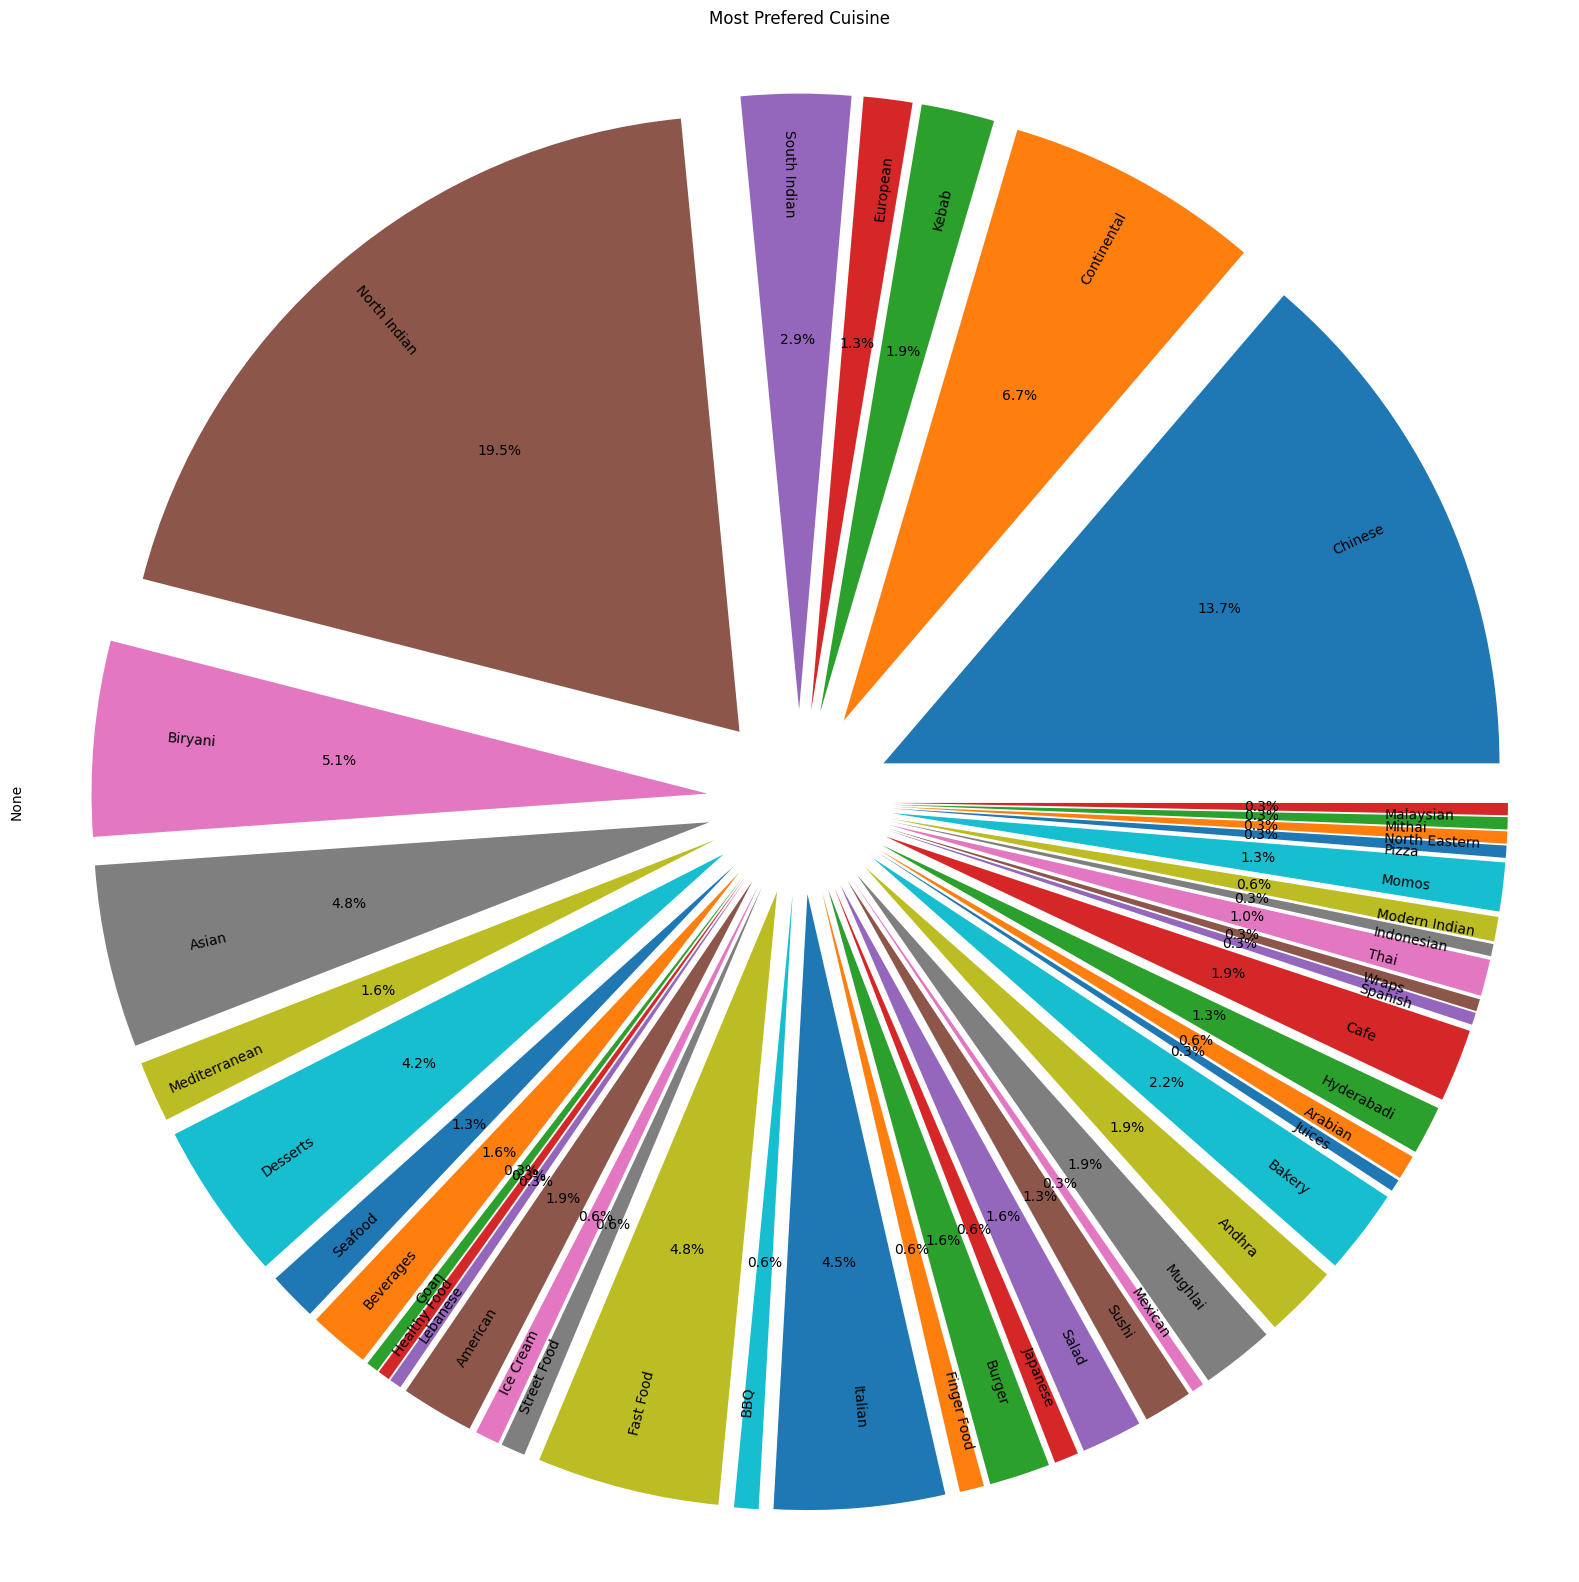

In [848]:
#Visualizing the cuisine prefferences of the hotels
explode=[0.15]*len(cuisine_frequency)
cuisine_frequency.plot(kind='pie',autopct='%1.1f%%',figsize=(20,20),explode=explode,title='Most Prefered Cuisine',labeldistance=0.8,rotatelabels = 270)

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the tickets booked on every days of the week.


##### 2. What is/are the insight(s) found from the chart?

I have found that Nort Indian cuisine and Chinese cuisine is highly offered cuisine by the hotels with a percentage of 19.5 and 13.7 respectively.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graph we can clearly understand the most important cuisines offered by the hotels. This indicates that the customers are highly choosing the north Indian cuisine, chinese cuisine. So, Zomato can target on customers intrested in these cuisine through marketing.

#### Chart - 2 - Bar Chart on Number of different Cuisines offered by different hotels

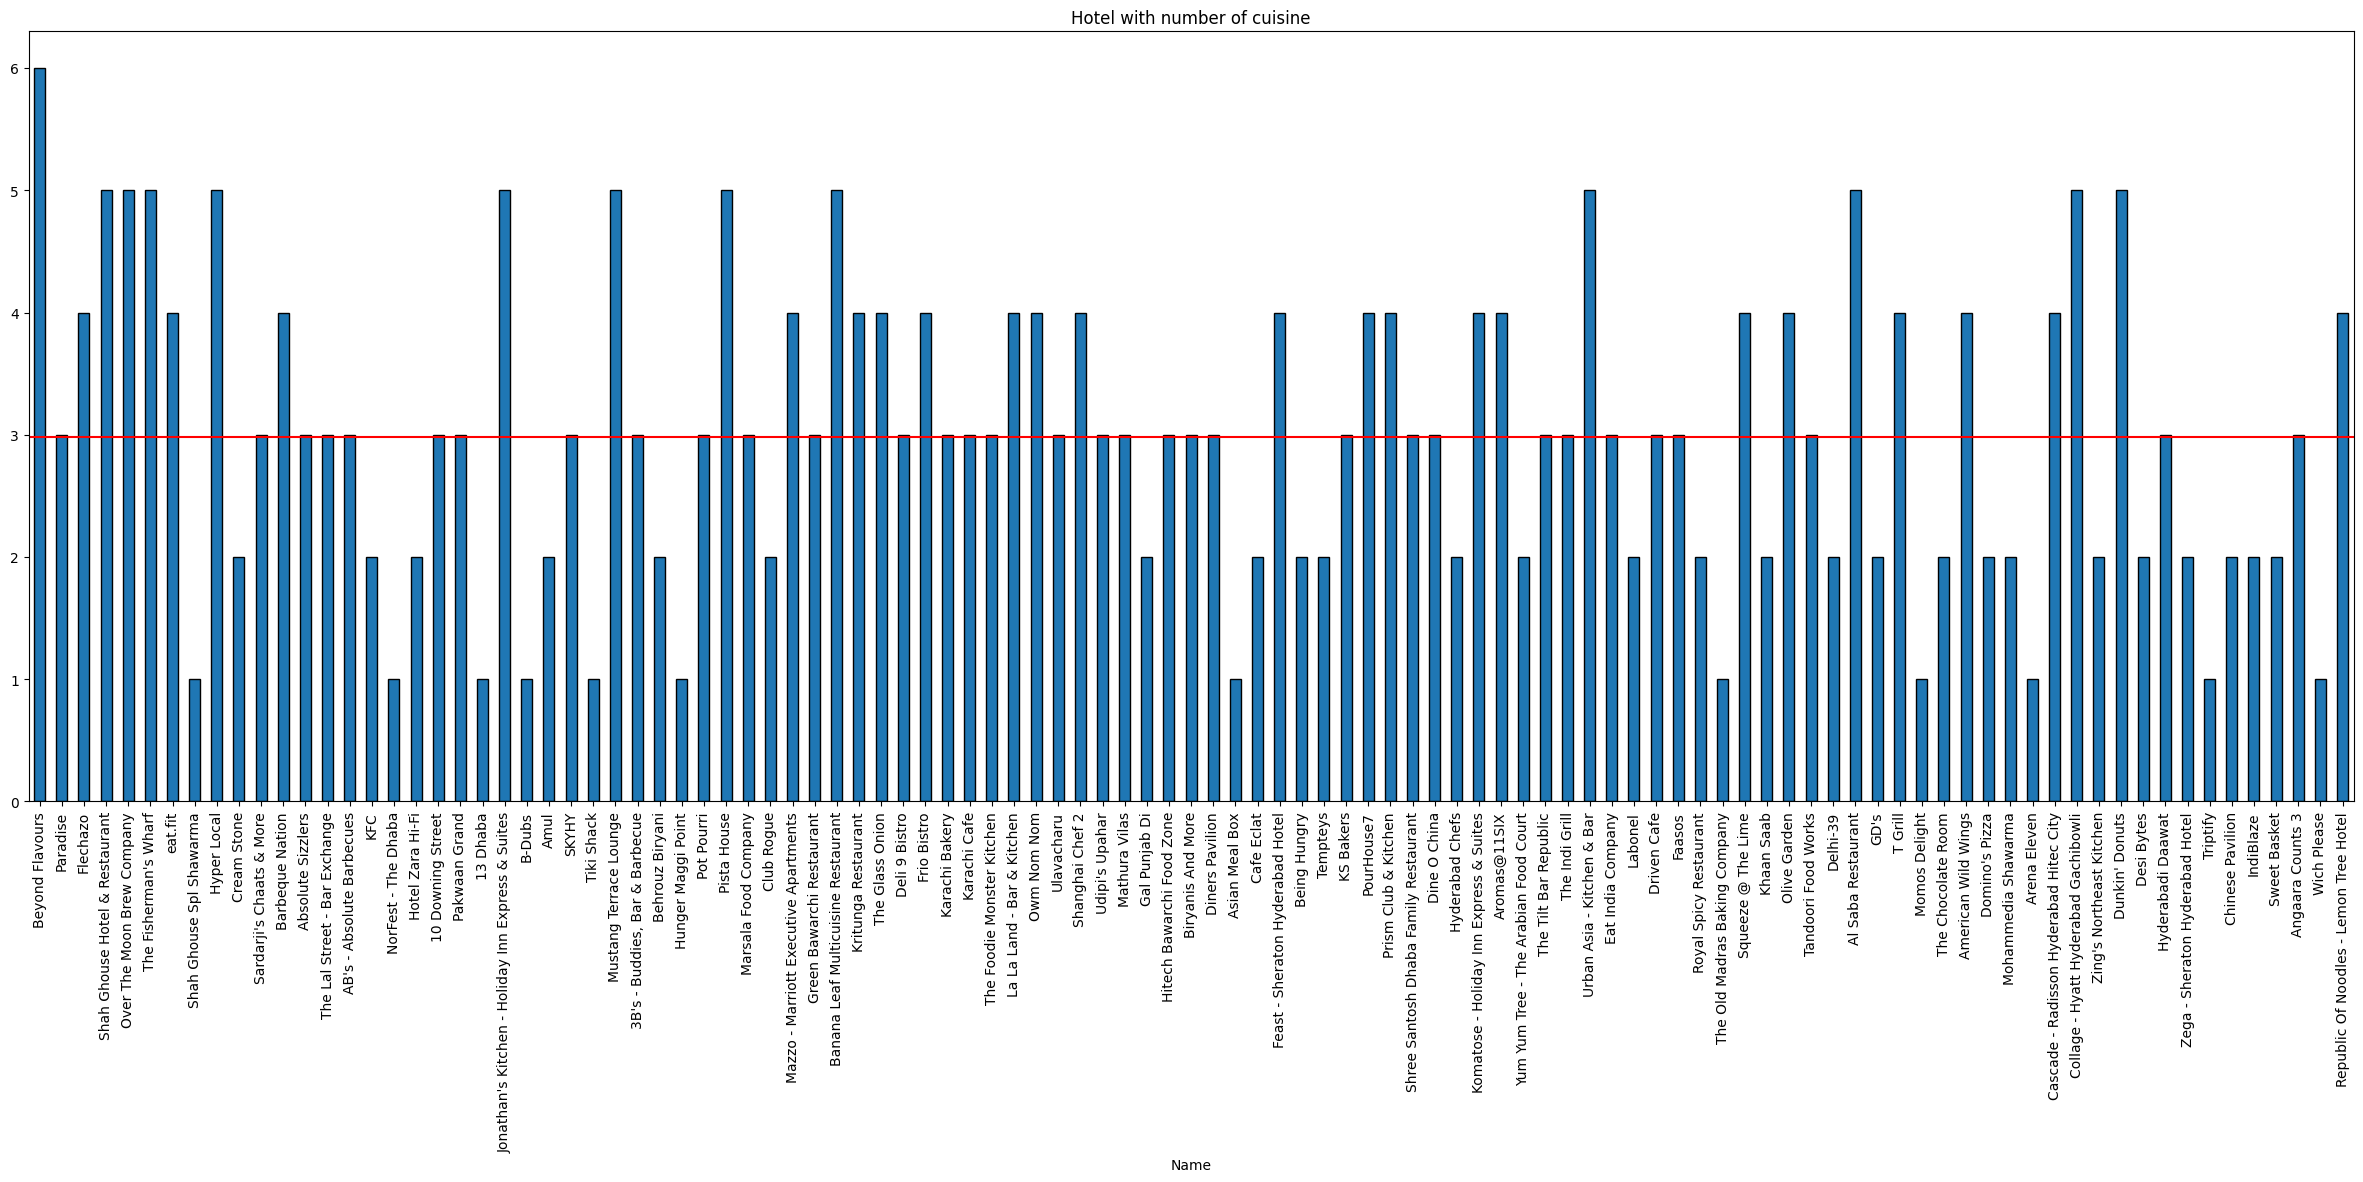

In [849]:
#Number of cuisine varites offered by hotel.
cuisine_count.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Hotel with number of cuisine')
plt.axhline(cuisine_count.mean(),color='red')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the graph I have identified the following observations:
*  The hotel Beyond Flavours have the highest number of cuisines offered. 
*  The average number of cuisines provided by the restaurants is 3. This means mostly hotels are multicuisine.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the graphs we can say most of the hotels are multicuisine. So there is a need to identify the customers interest based on cuisinies chosen and recommend the hotels based on customer choice.

#### Chart - 3 - Bar Chart on Costs of different hotels

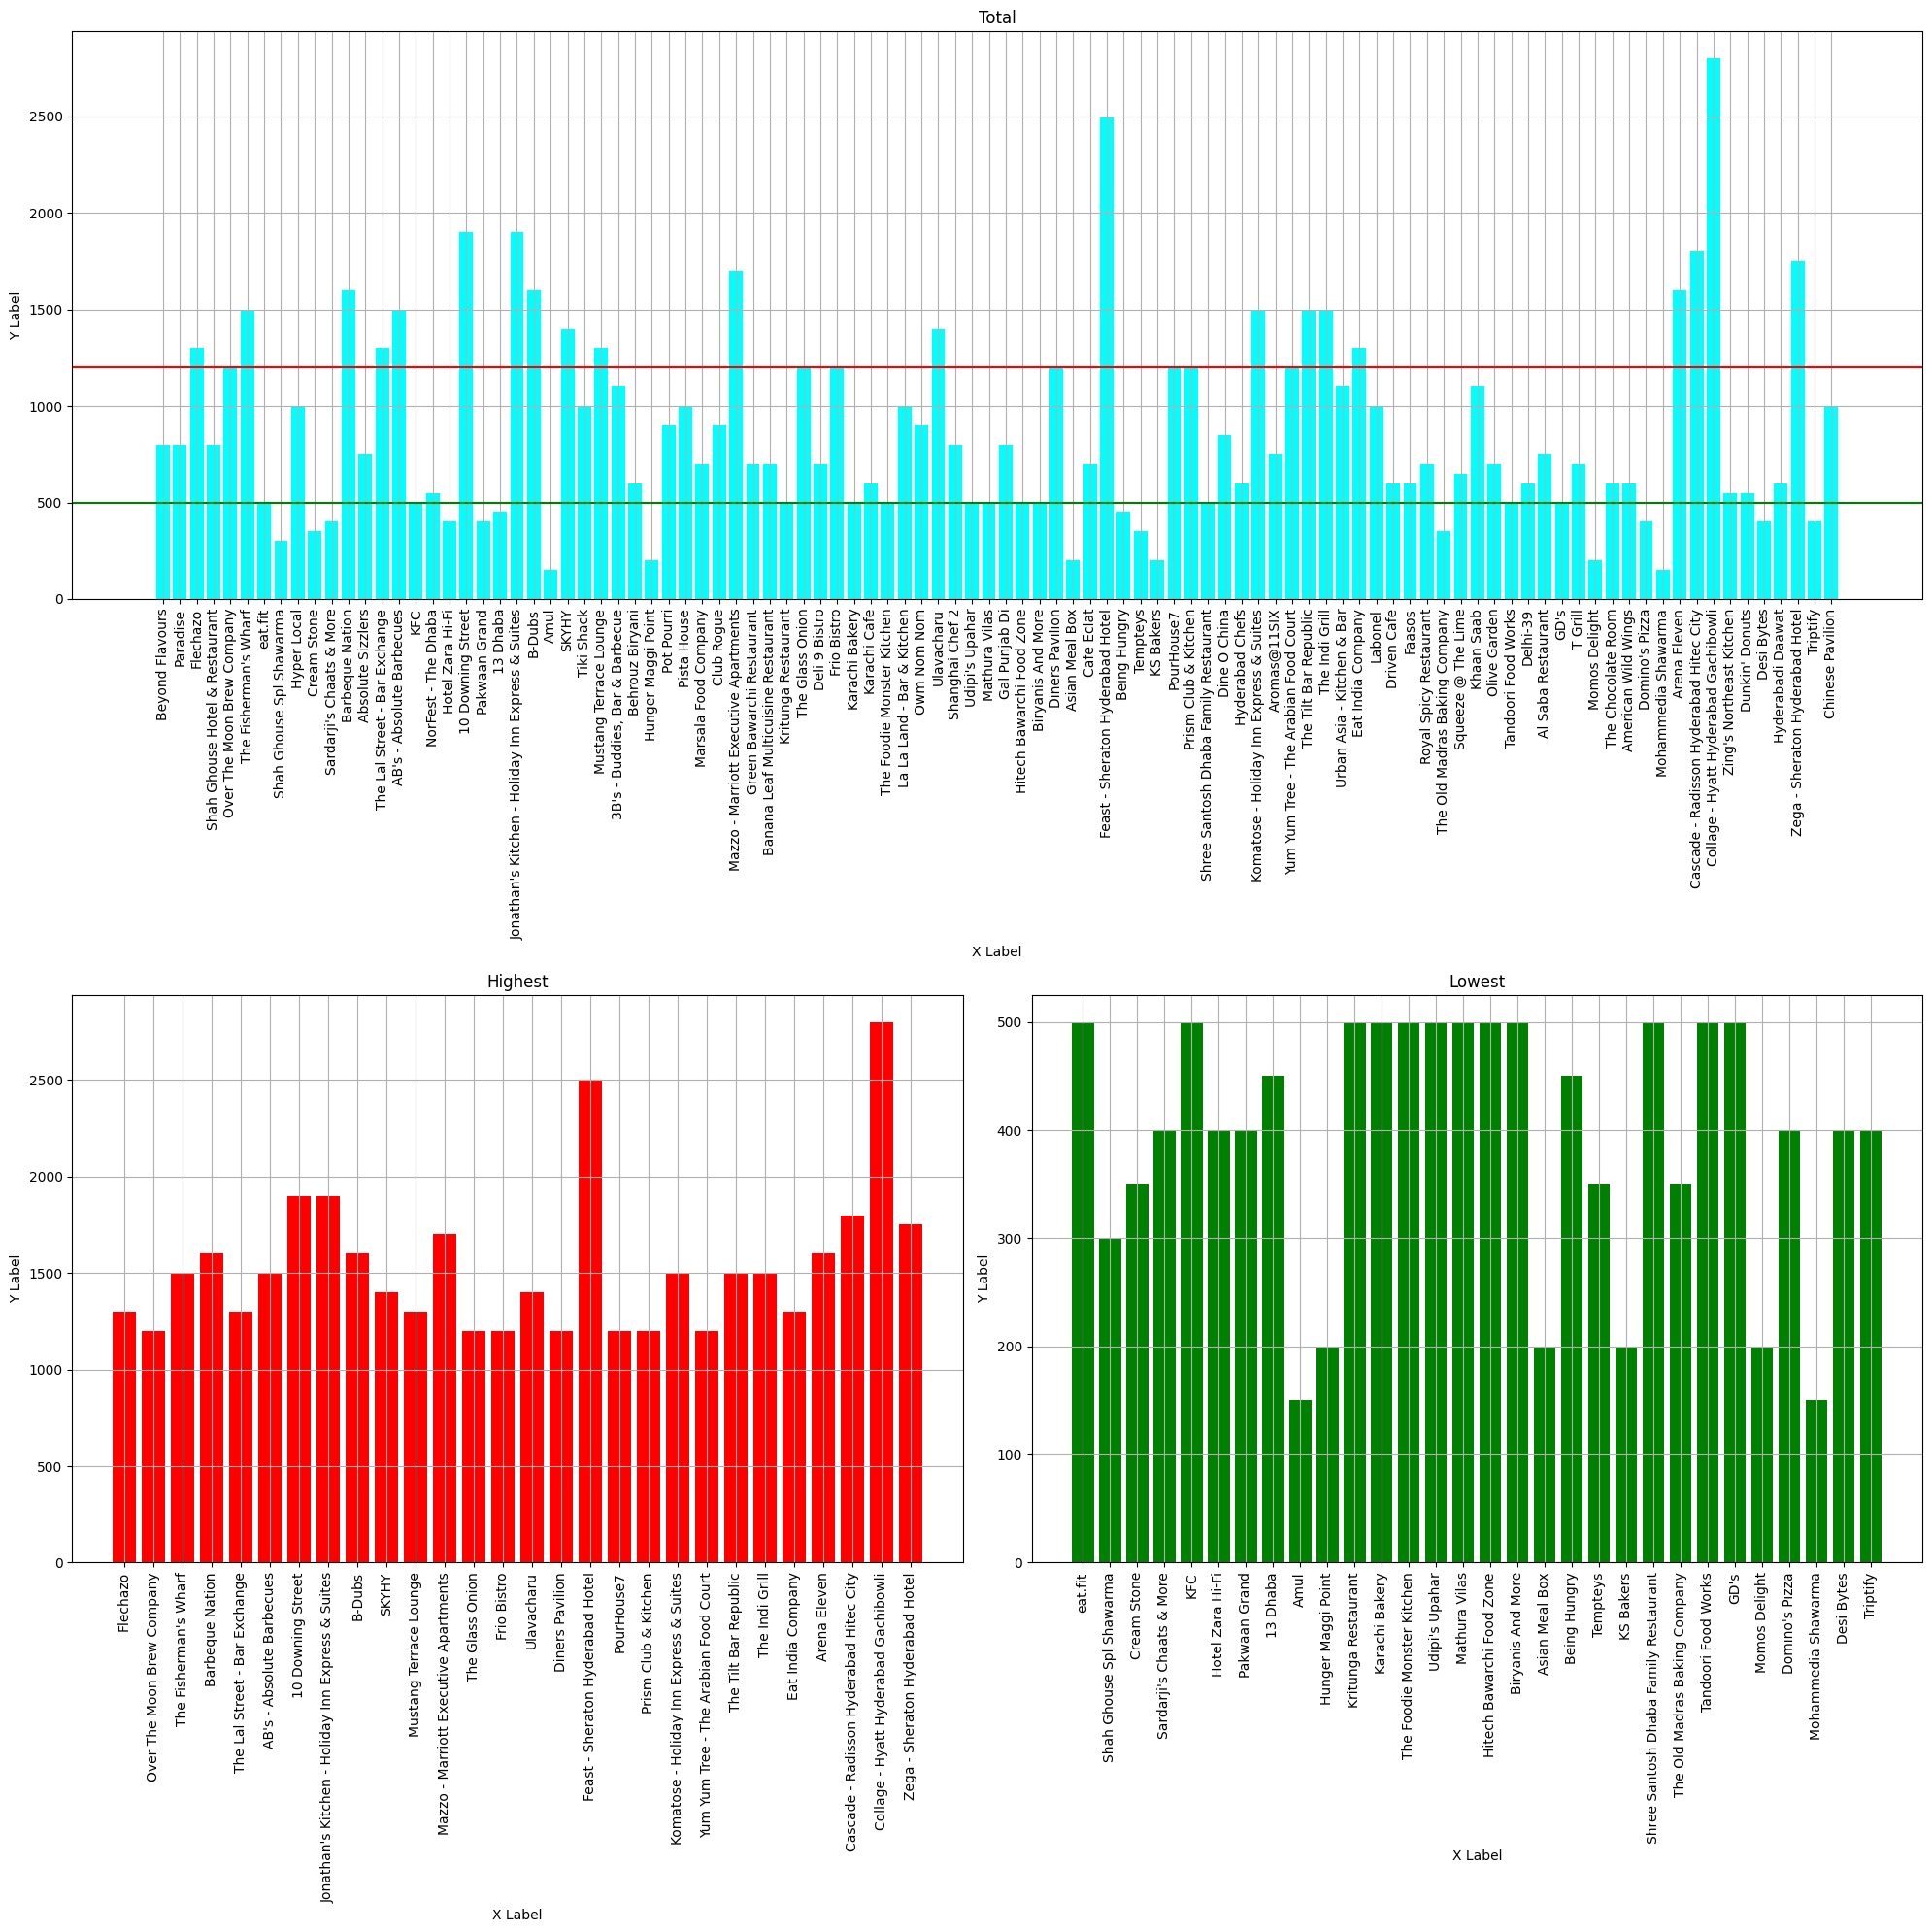

In [850]:
#visualization of plot
my_plot(cost_plot_pass)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I have made the following conclusions:
*  College-Hyatt Hyderabad Gachibowli has the highest price among the hotels.
*  Amul has the lowest price among the hotels.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graphs help us to know the cost for meal in the hotels. Further this will help to categorizze the hotels into costly hotels and cheap hotels.

#### Chart - 4 - Bar Chart on Ratings of different hotels

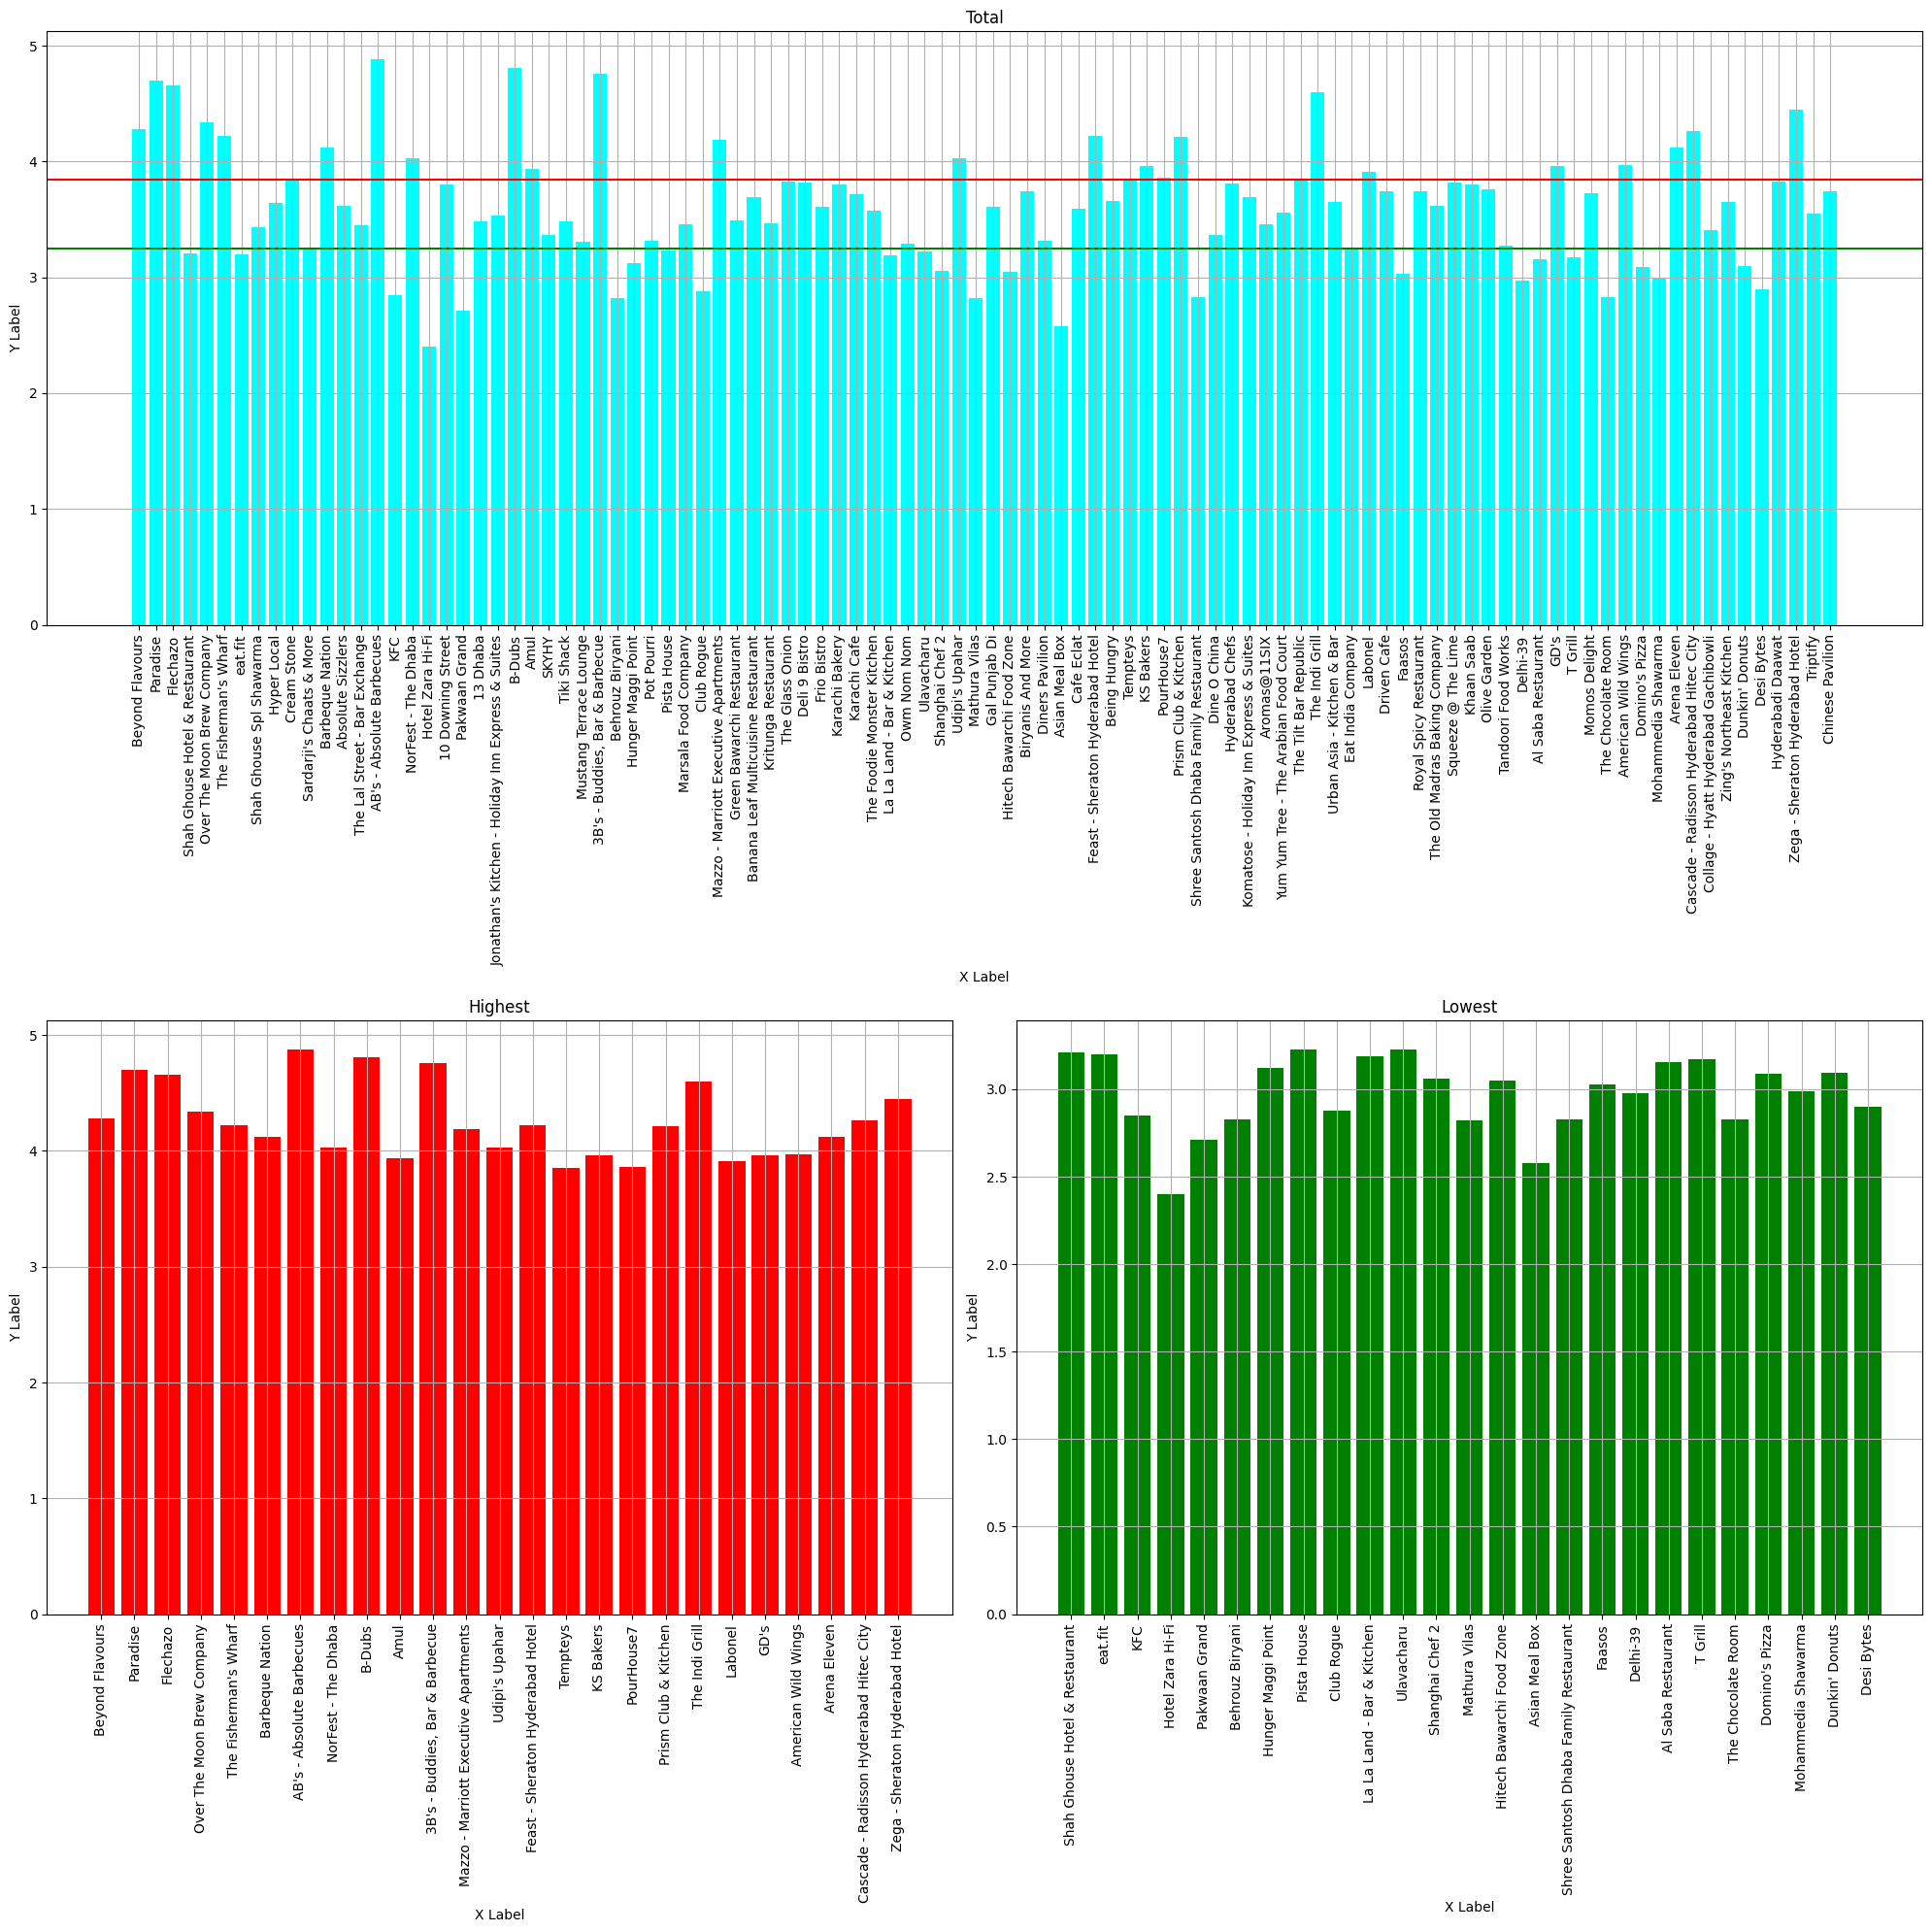

In [851]:
my_plot(rating_plot_pass)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I have made the following conclusions:
*  AB's Absolute Barbeque has highest ratings.
*  KFC is the least rated restaurant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato's rating system is intended to provide users with an objective measure of the quality of a hotel or restaurant based on the experiences of other users. The ratings are also used to help Zomato identify the most popular and highly-rated hotels and restaurants in each location, which can help users make more informed choices about where to eat.

#### Chart - 5 - Bar Chart on Ratings of different hotels

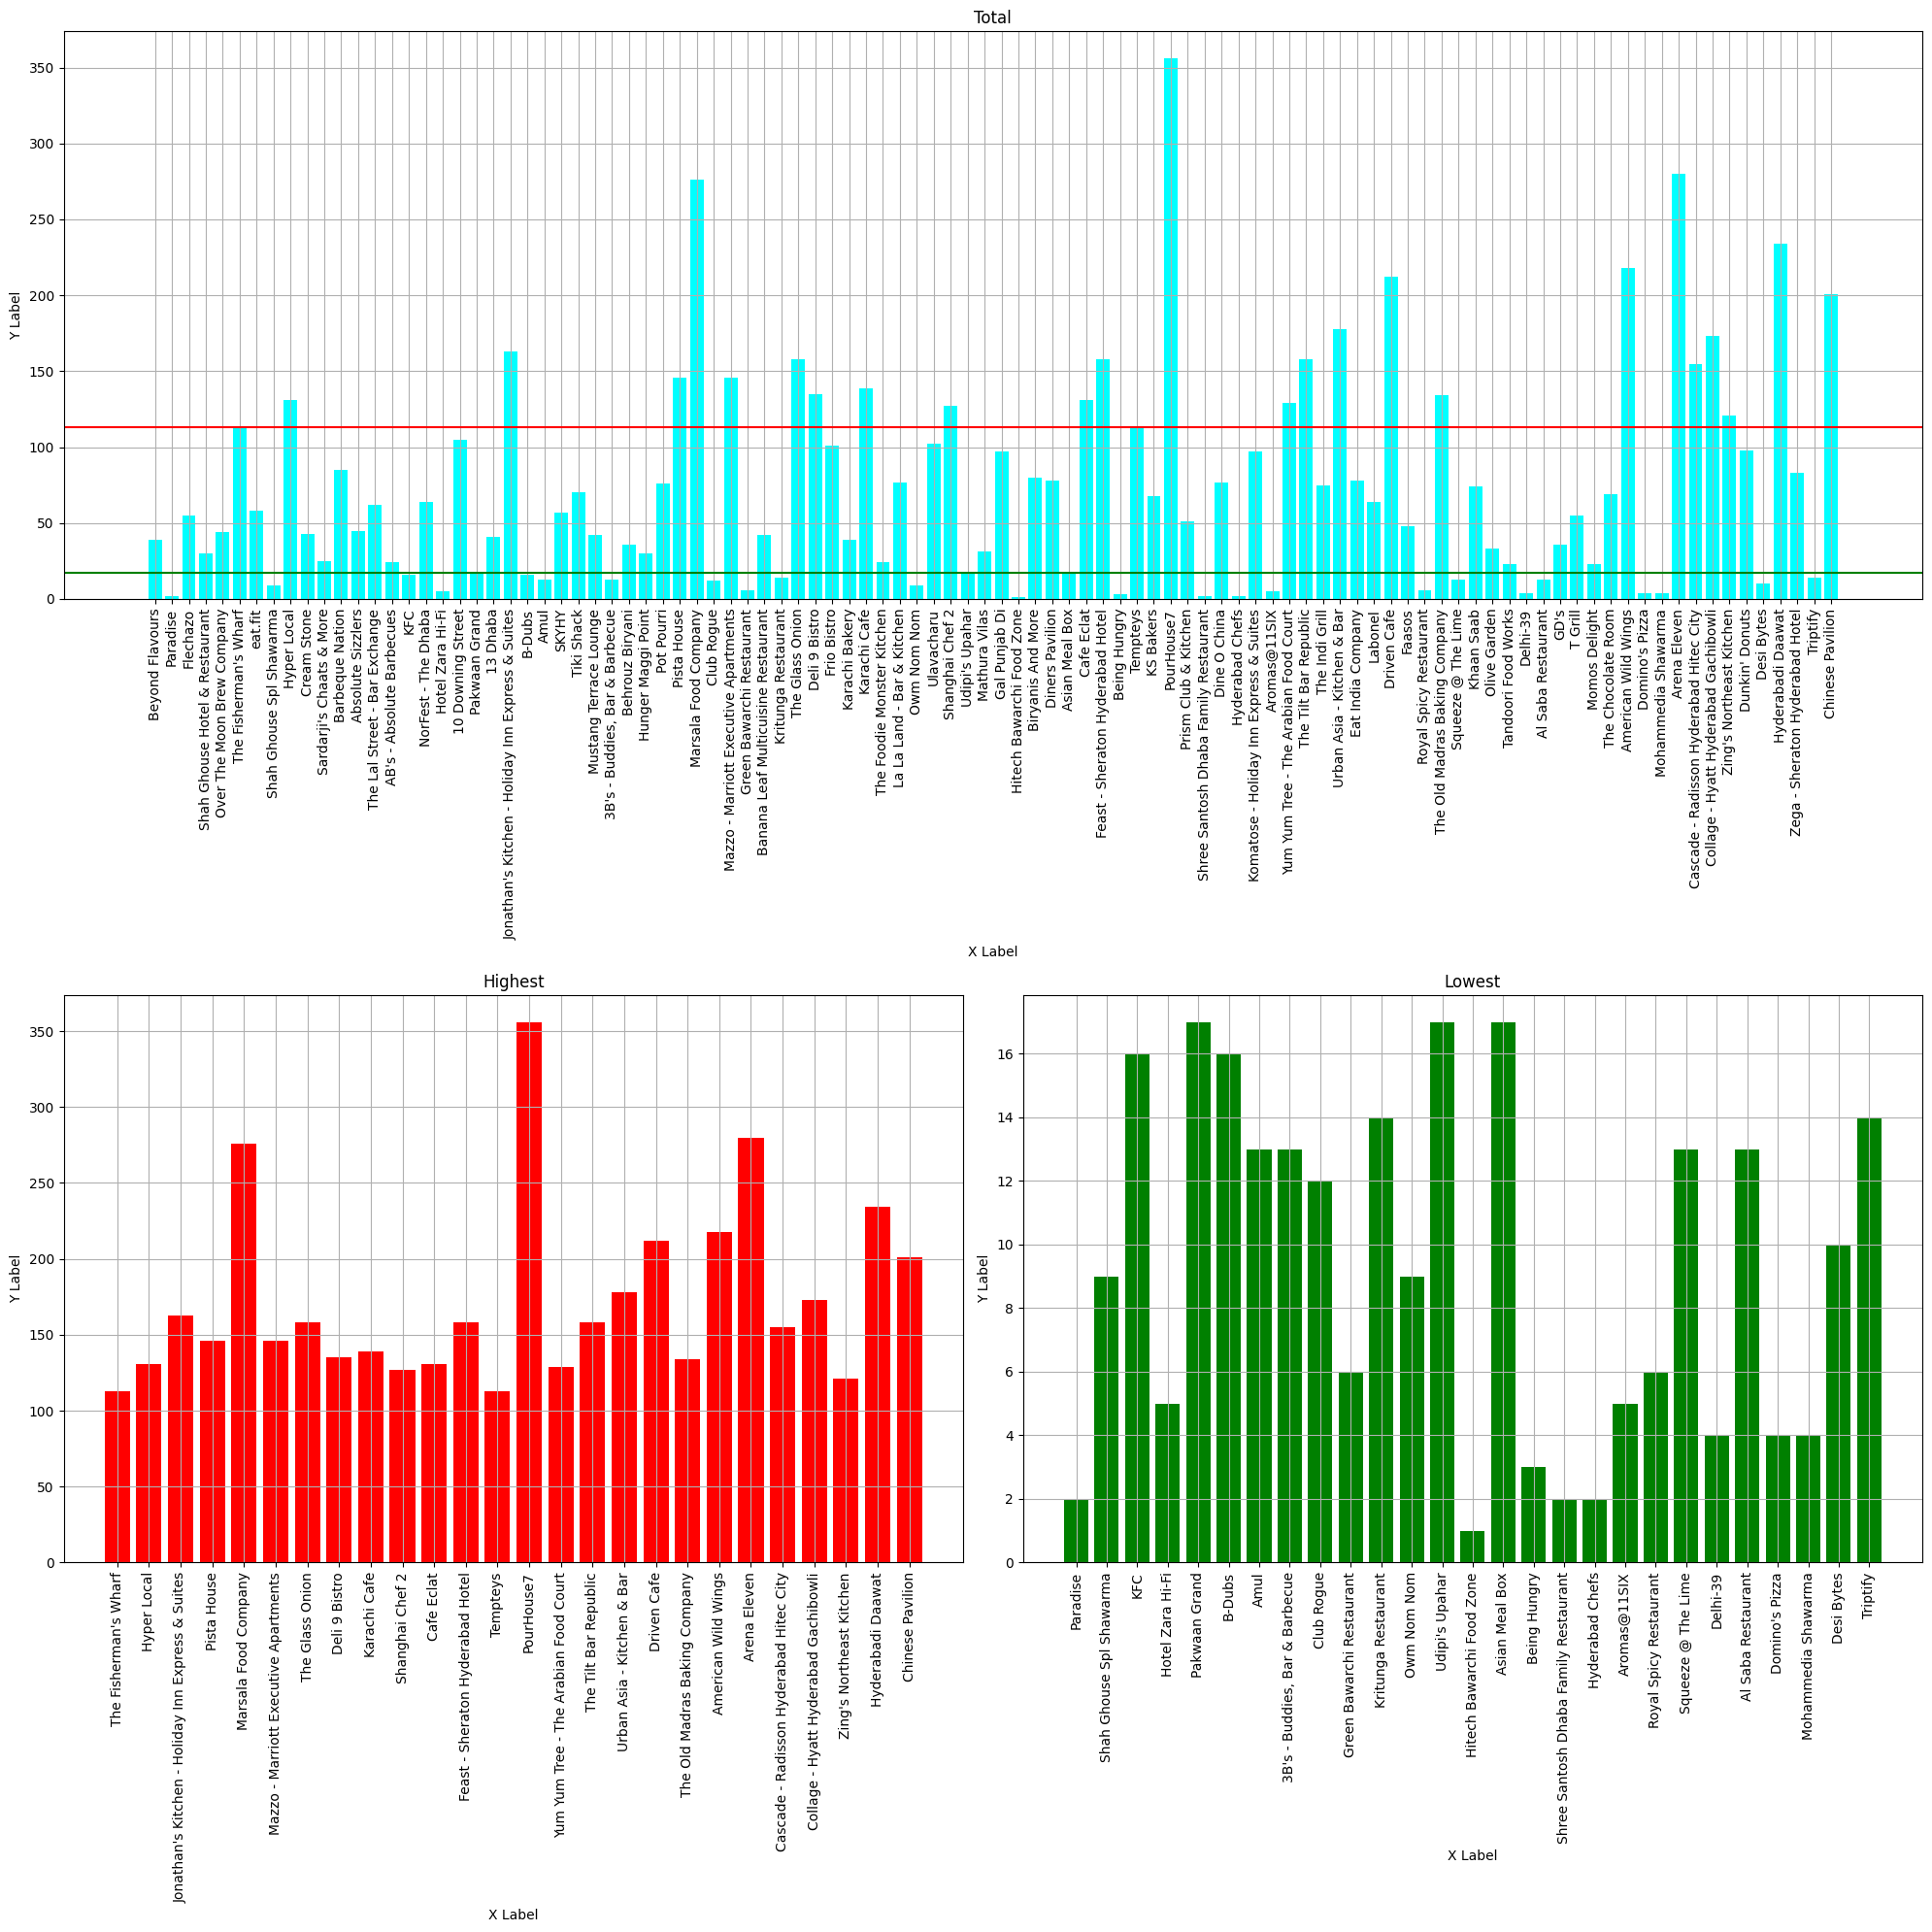

In [852]:
my_plot(pictures_plot_pass)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

From the above charts I have observed the following:
*  The hotel Pour House7 has the highest number of pictures uploaded.
*  The hotel Hitech Bawarchi Food zone has least number of pictures uploaded.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can enhance its database and improve its machine learning algorithms. The pictures can be analyzed for a variety of attributes, such as decor, lighting, and presentation of food, which can help Zomato make more accurate recommendations to users based on their preferences.

#### Chart - 6 - Scatter Plot on Cost and Ratings of different hotels

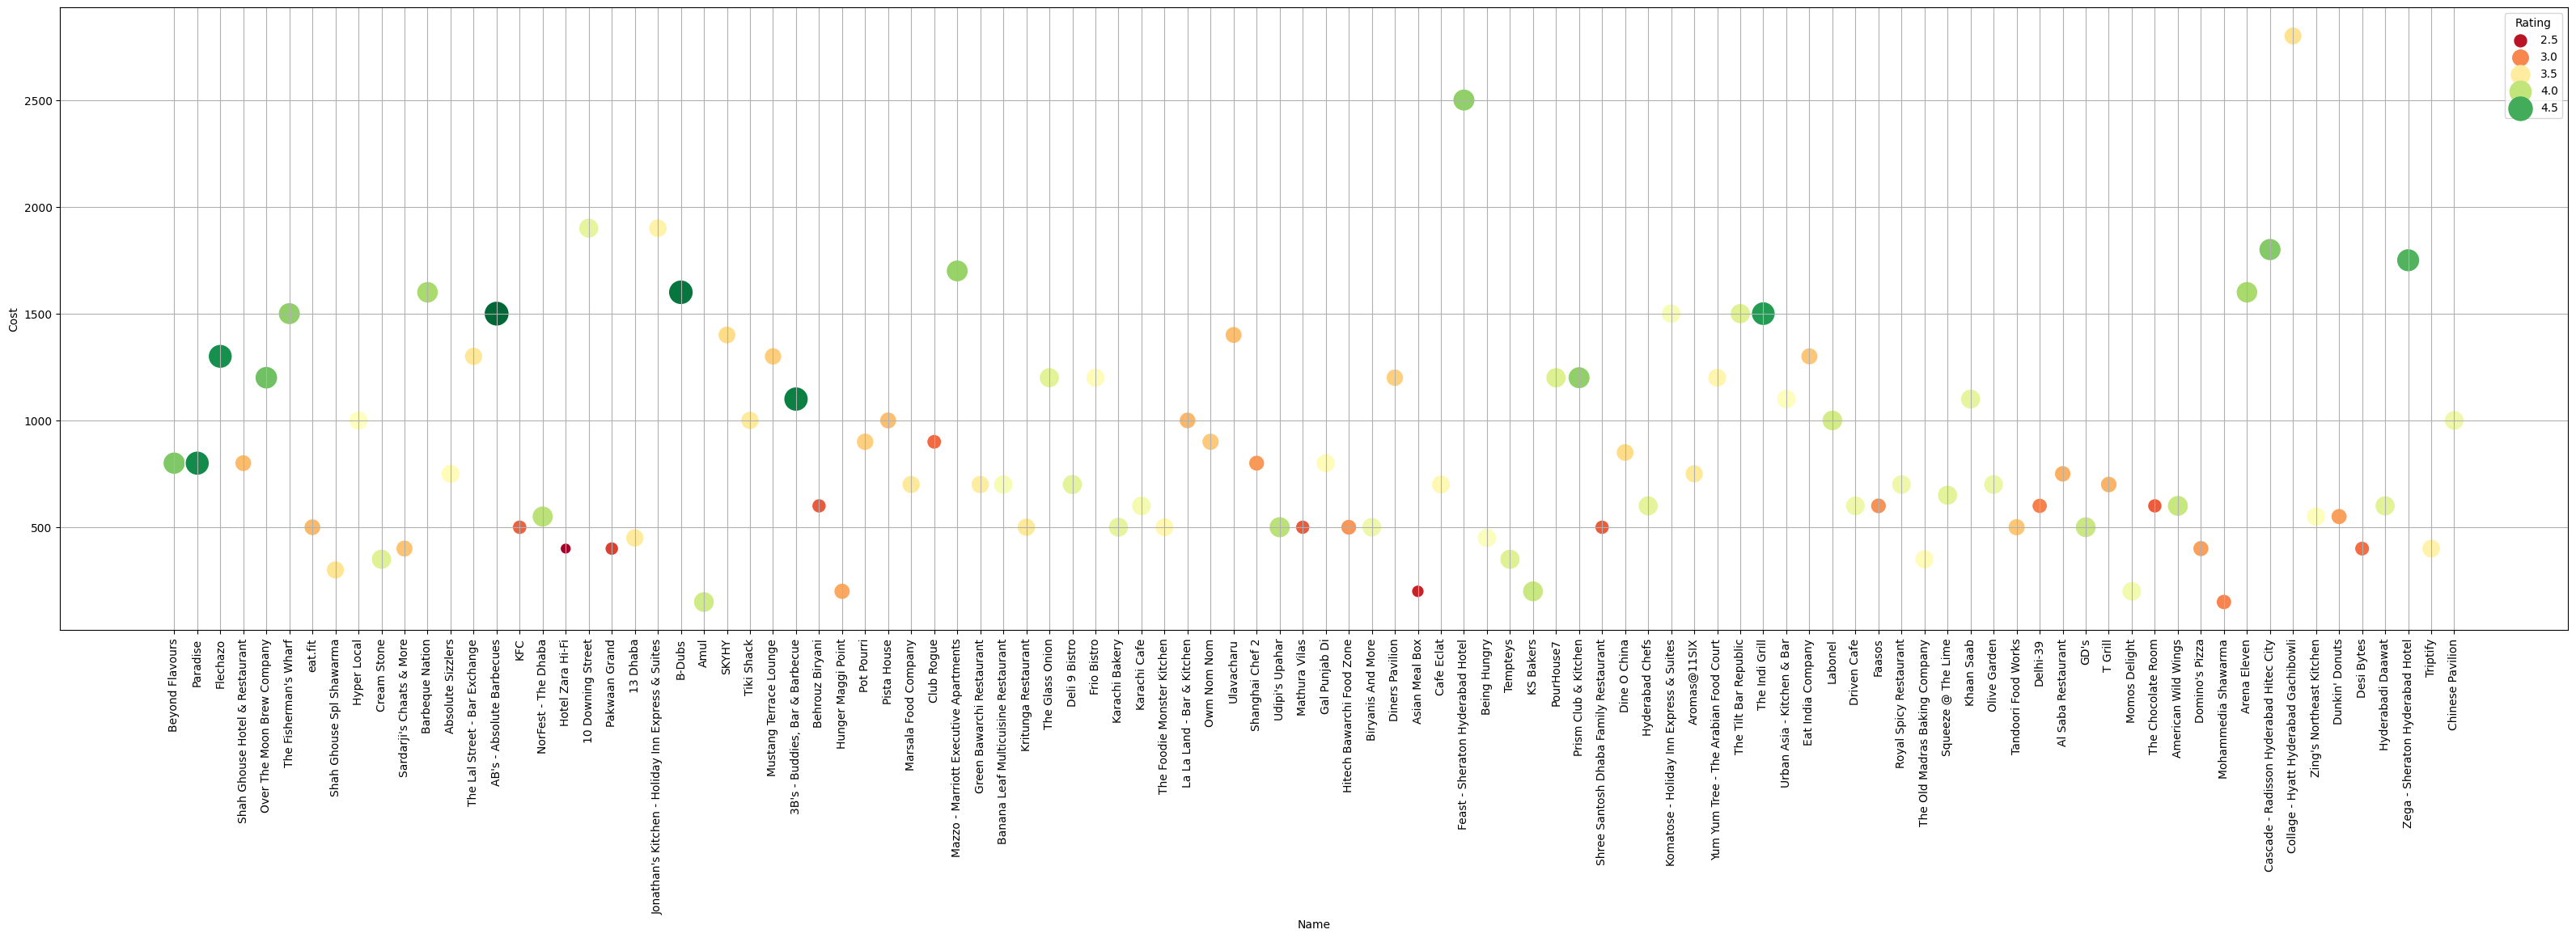

In [853]:
my_scatter(numerical_df,'Rating','Cost')

##### 1. Why did you pick the specific chart?

A scatter plot is a type of graph used to display the relationship between two continuous variables. It consists of a set of data points plotted on a two-dimensional coordinate system, where each data point represents a pair of values for the two variables being studied.

##### 2. What is/are the insight(s) found from the chart?

I have made a comparision between cost and ratings of the hotels and have found the following:
*  Hotel zara Hi-Fi is the least rated hotel 
*  Hotel AB's Absolute Barbeque, B-Dubs, 3B's Buddies Bar and Barbeque are top rated restaurants and their cost vary between 1000 to 1600 rupees.
*  Also there are many low rated hotels in price range below 1000 rupees.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Comparing the cost of a meal at a hotel or restaurant with its rating can be a useful way for users to make informed decisions about where to eat, based on their budget and preferences.

Also, Zomato should remove hotels which are least rated and less number of orders to be provide good service and be competitive in business.

#### Chart - 7 - Scatter Plot on number of cuisines and Ratings of different hotels

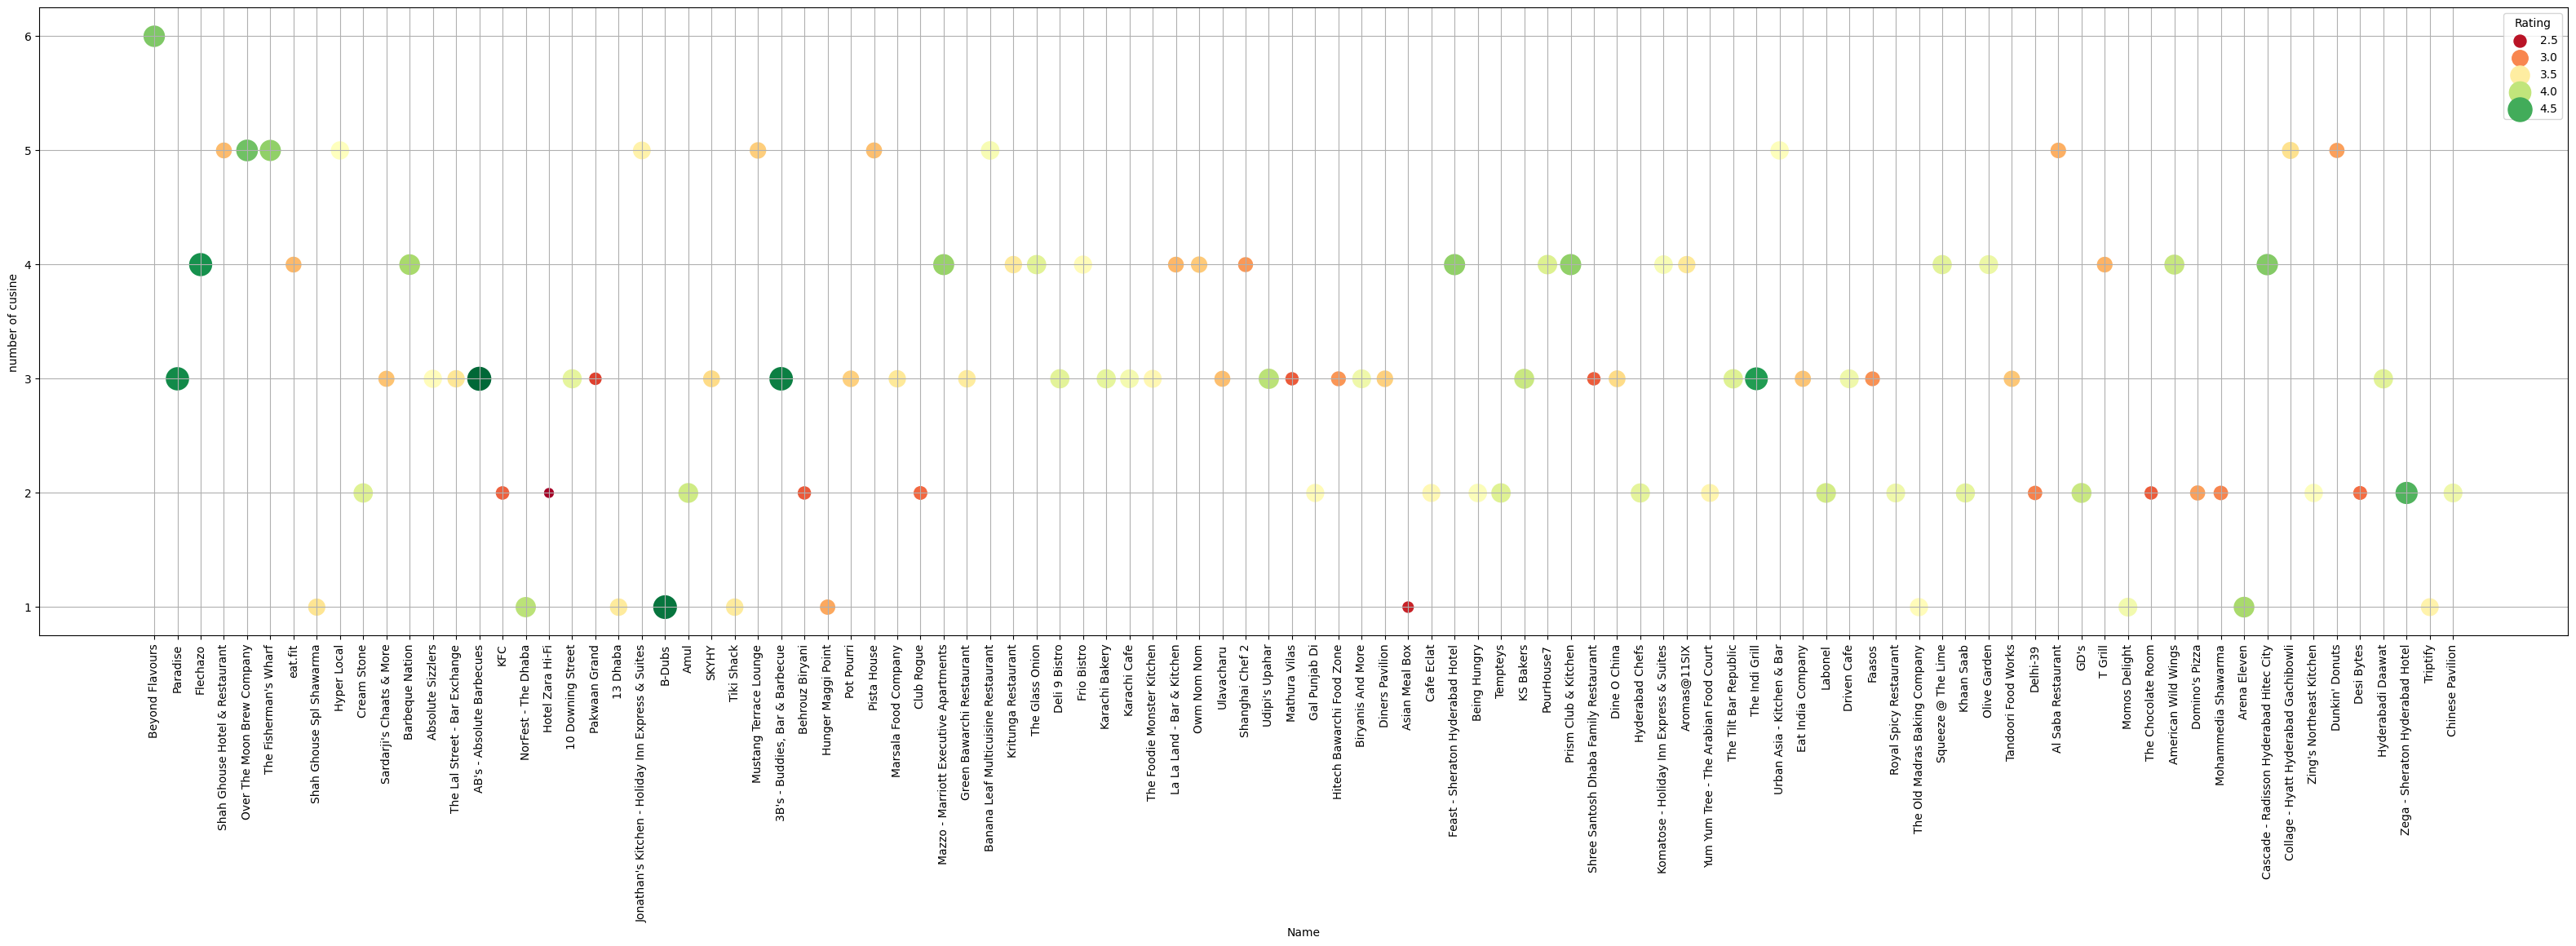

In [854]:
my_scatter(numerical_df,'Rating','number of cusine')

##### 1. Why did you pick the specific chart?

A scatter plot is a type of graph used to display the relationship between two continuous variables. It consists of a set of data points plotted on a two-dimensional coordinate system, where each data point represents a pair of values for the two variables being studied.

##### 2. What is/are the insight(s) found from the chart?

From the above plots I have made the following observations:
*   From the list of highest number of cuisines I have found that the hotel Flechazo has the highest rating and shanghai chef 2 has the lowest rating.
*   From the lowest nuber of cuisines list I have found that B-Dubs has the highest rating and Hotel Zara-Hifi has the lowest number of ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing the ratings of different cuisines and comparing them with competitors can help businesses identify areas where they need to improve to stay competitive in the market. This information can be used to make strategic decisions and investments to improve their offerings and attract more customers.

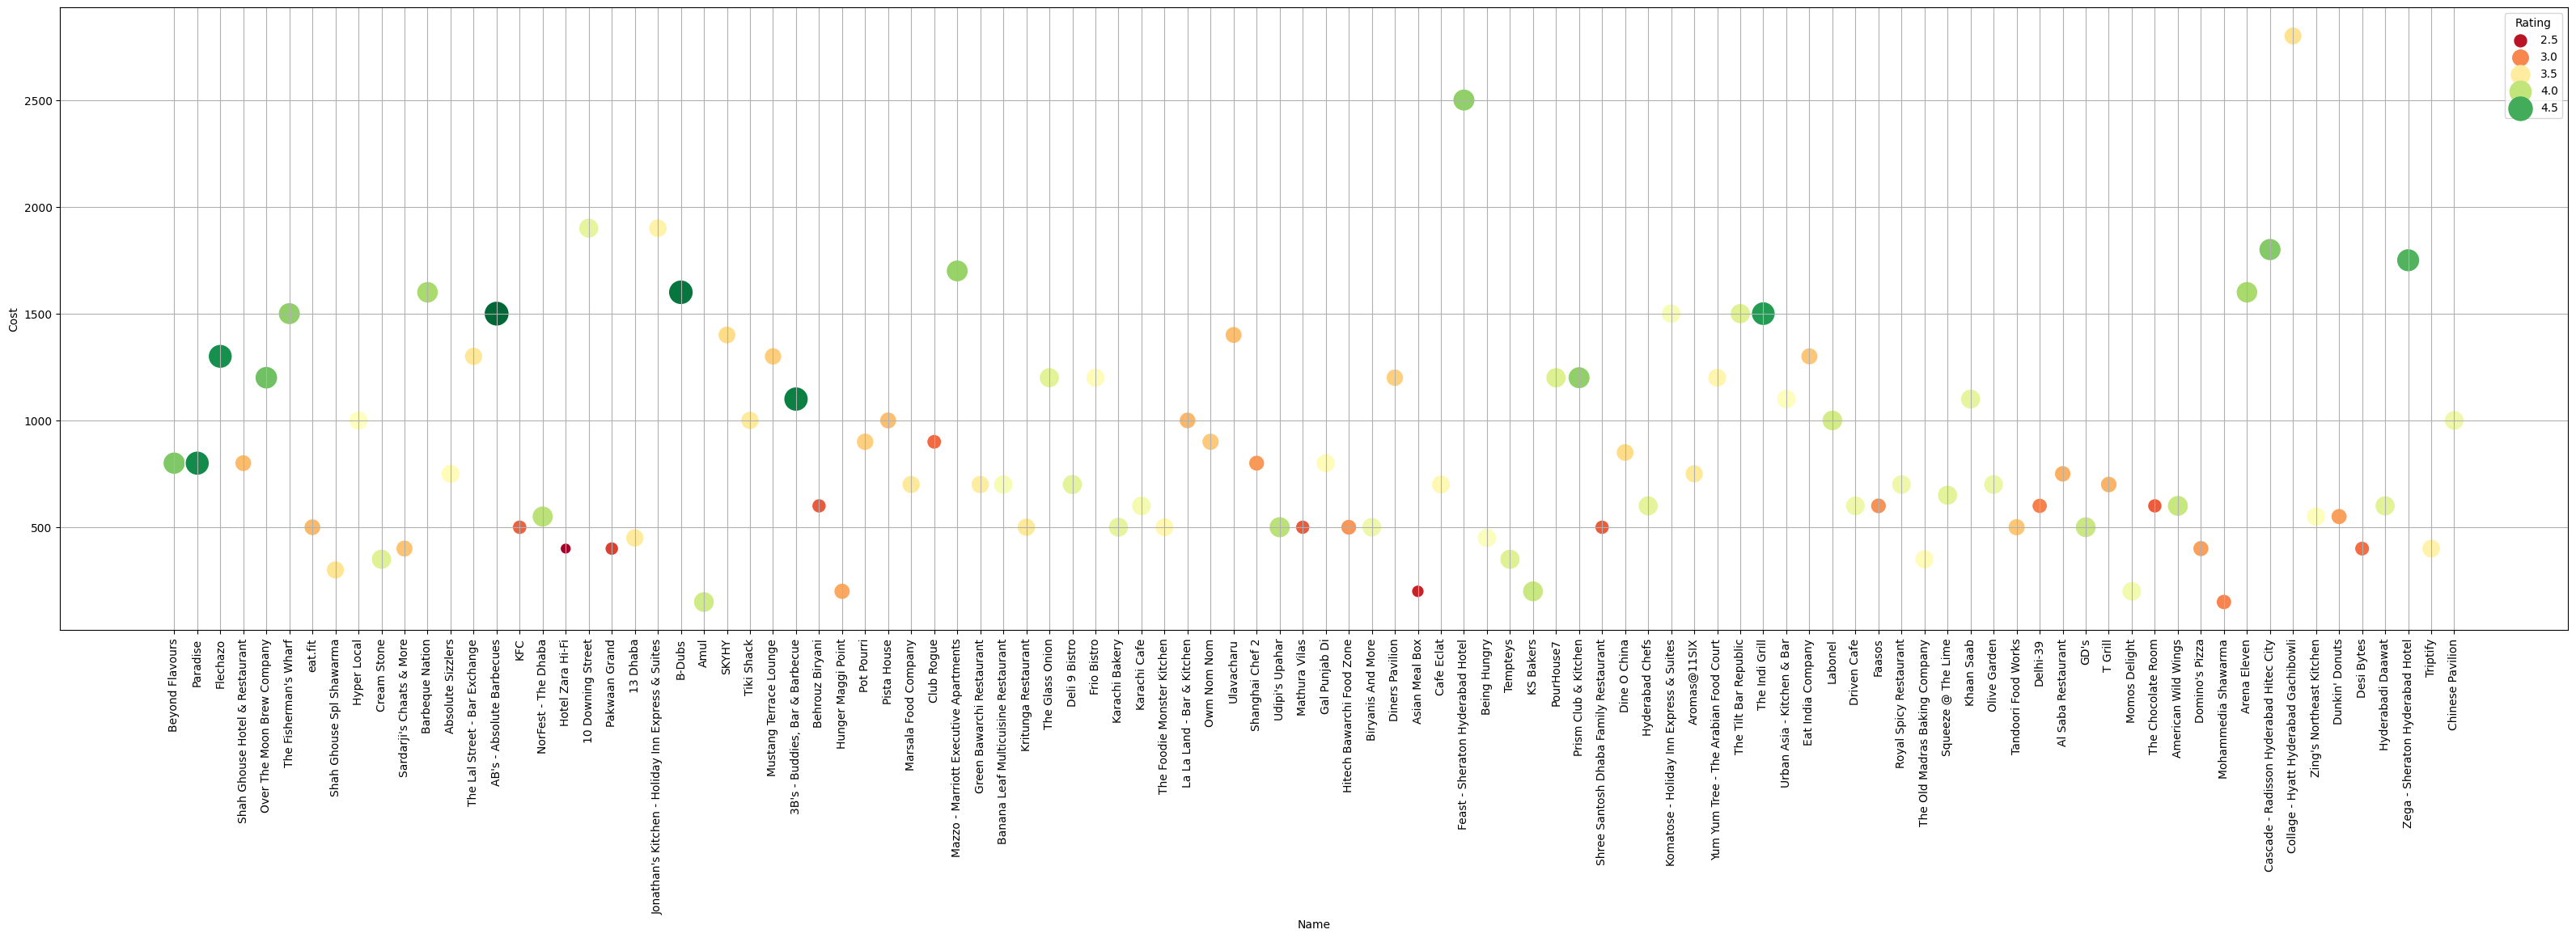

In [855]:
my_scatter(metadata,'Rating','Cost')

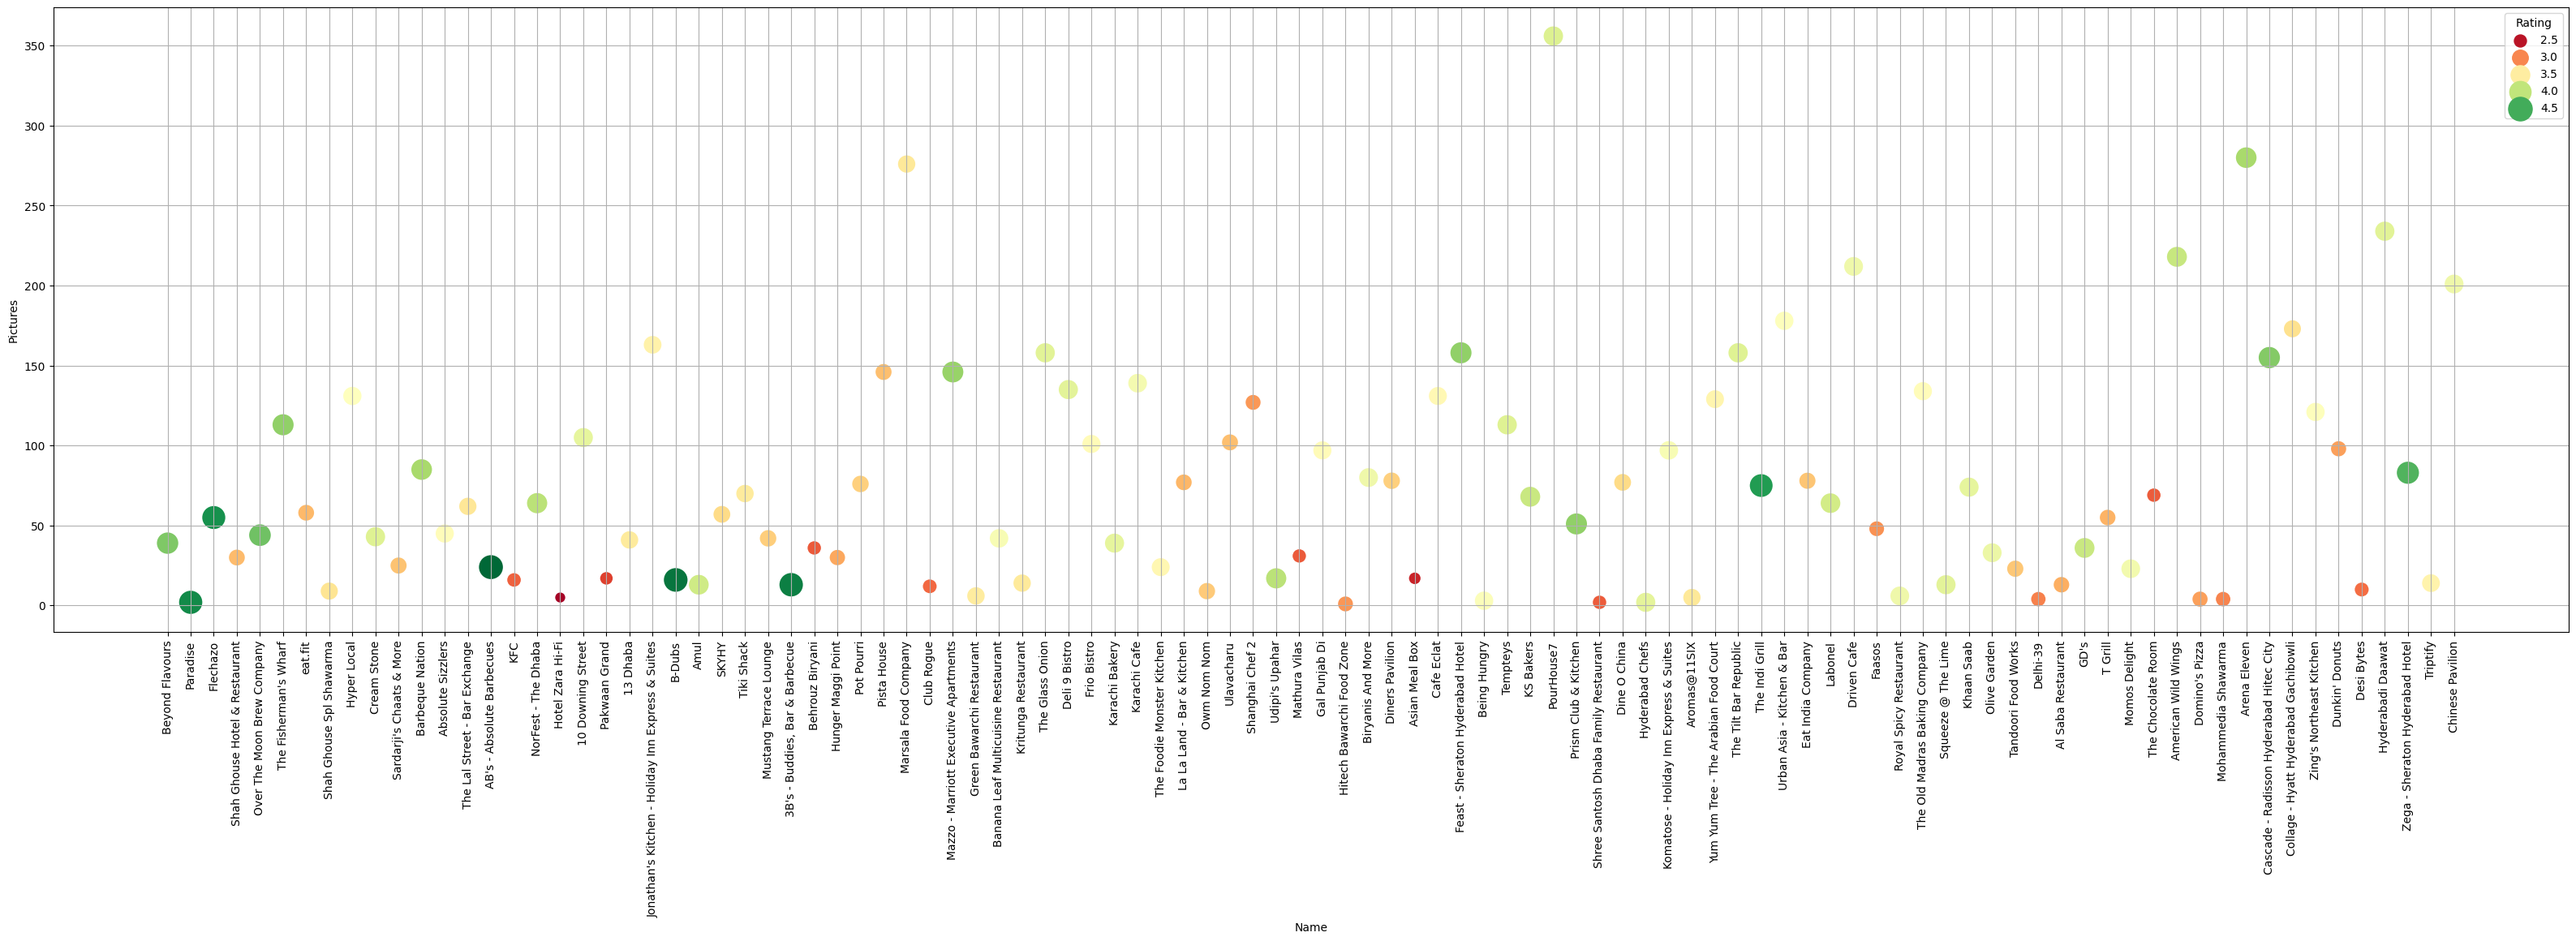

In [856]:
my_scatter(rating_plot_pass,'Rating','Pictures')

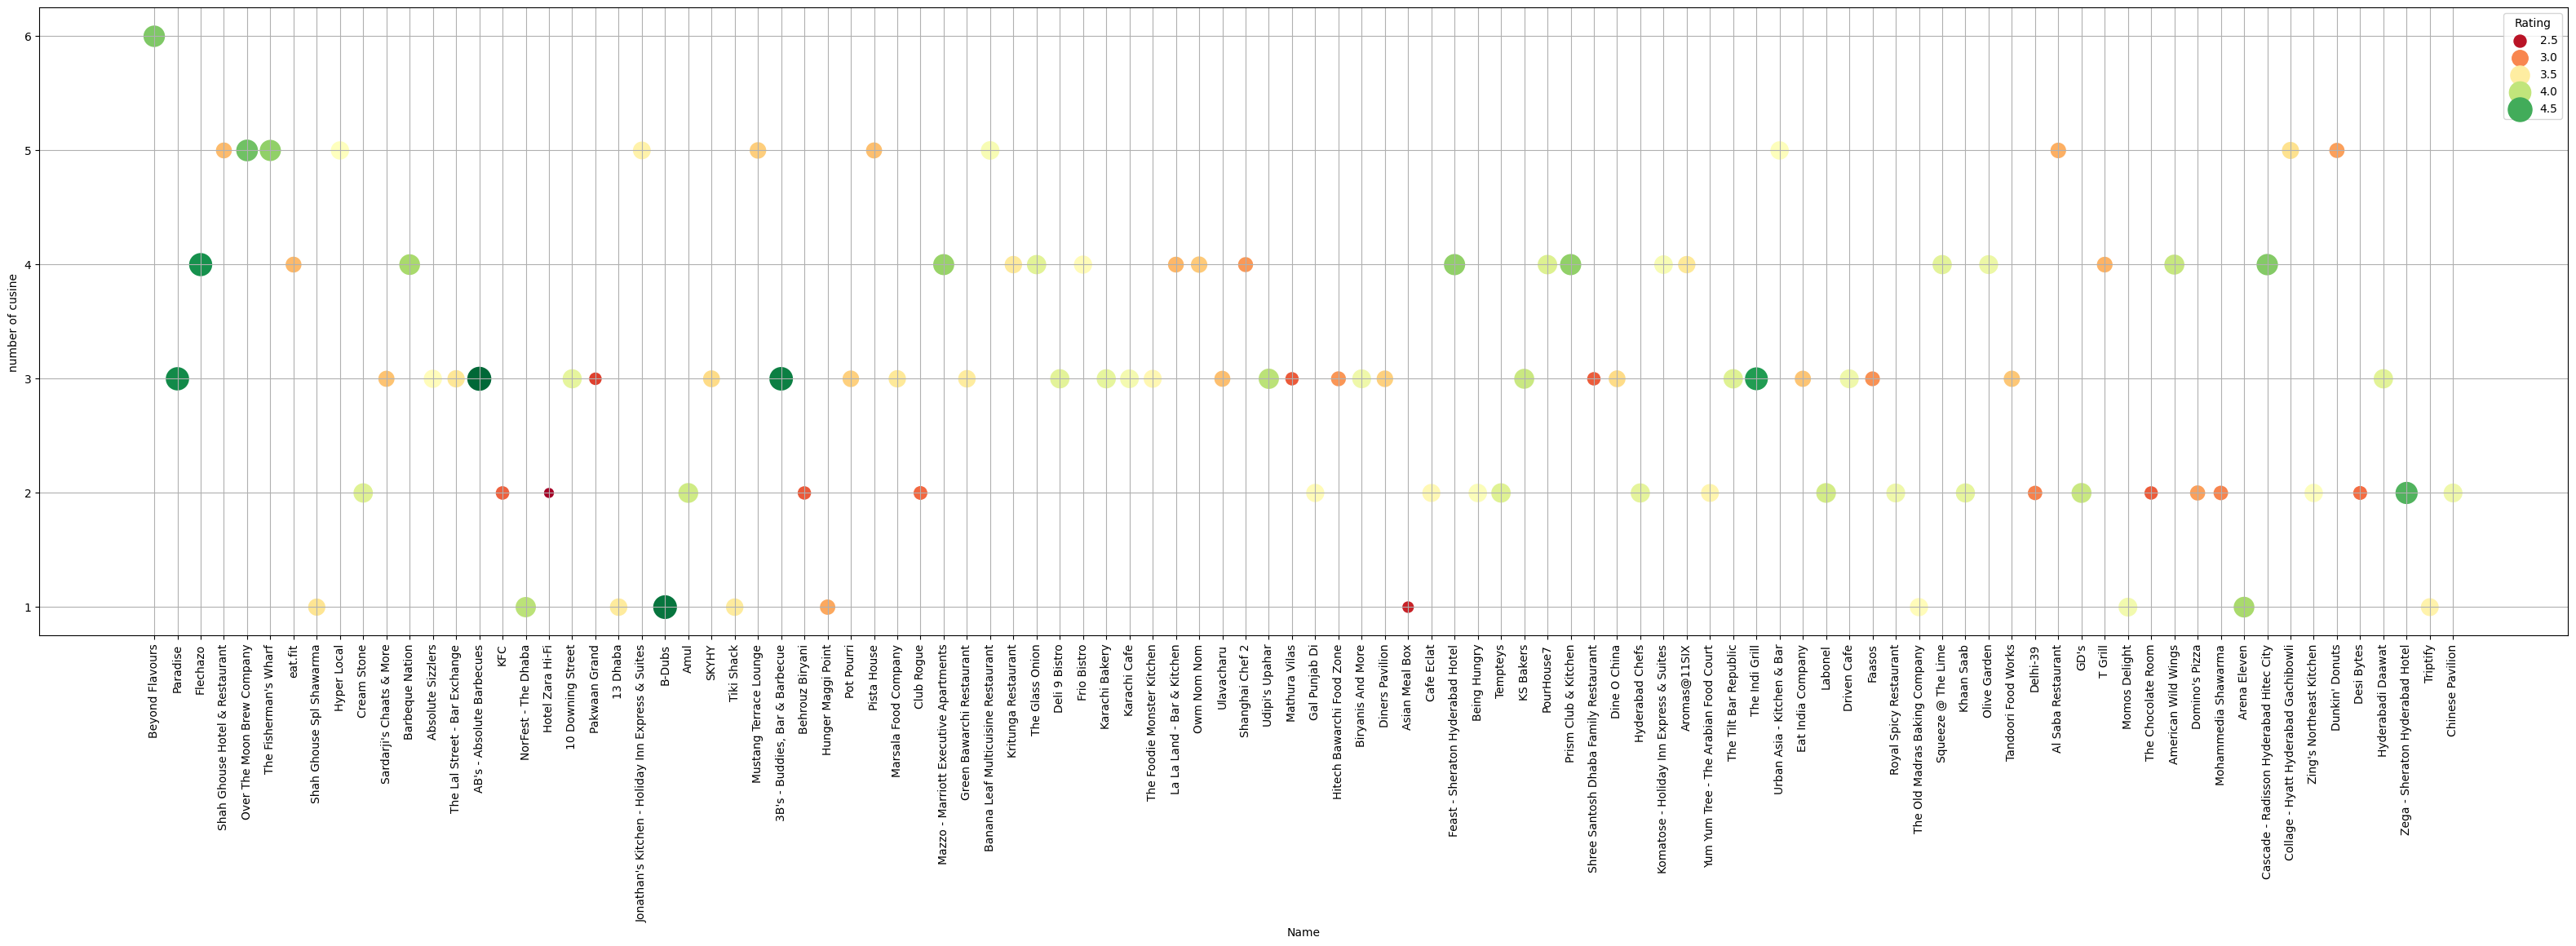

In [857]:
my_scatter(rating_plot_pass,'Rating','number of cusine')

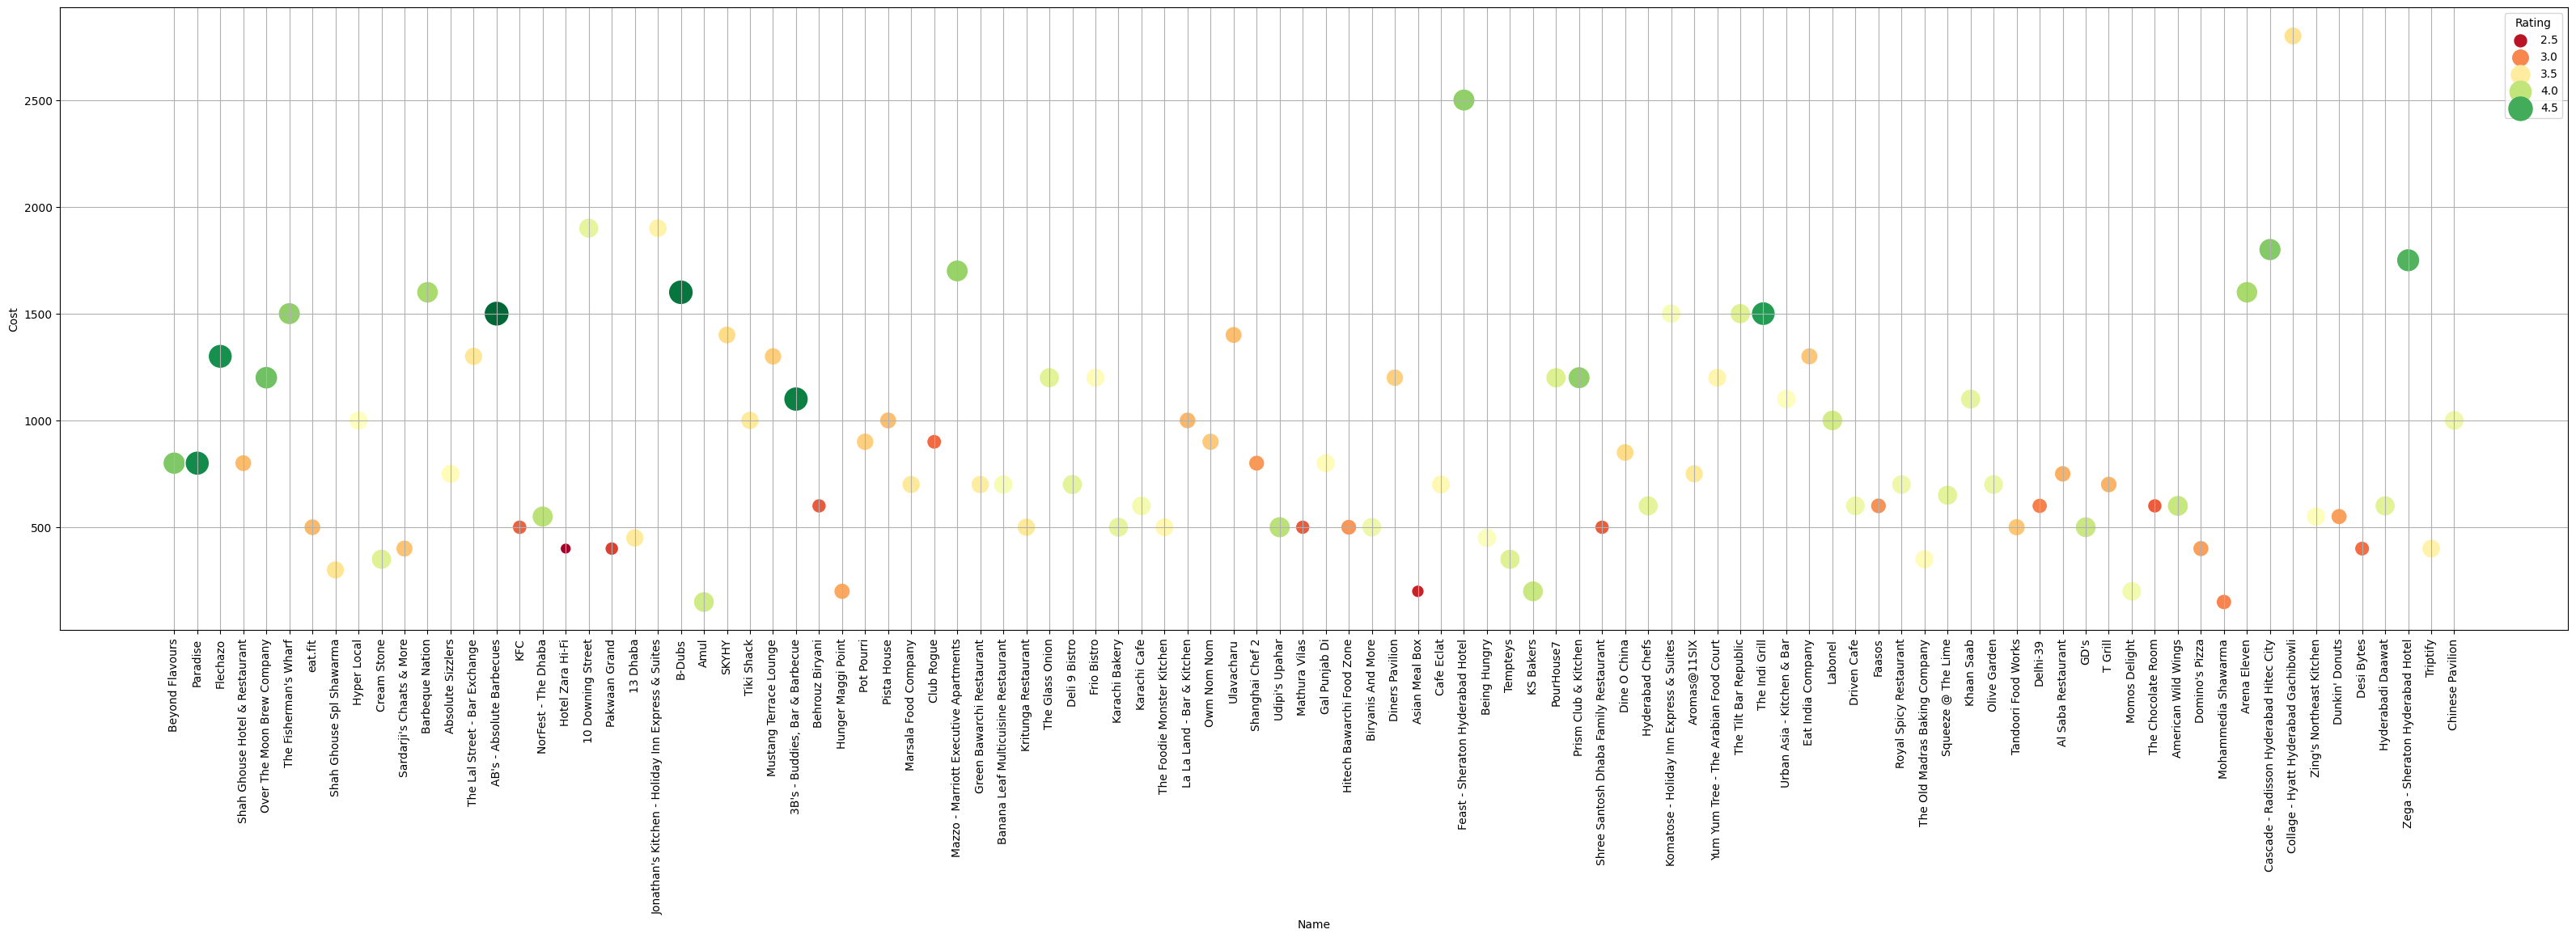

In [858]:
my_scatter(metadata,'Rating','Cost')

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [859]:
numerical_df[numerical_df.duplicated()]

Empty DataFrame
Columns: [Cost, number of cusine, Review, Rating, Pictures]
Index: []

In [860]:
# Handling Missing Values & Missing Value Imputation
numerical_df.isnull().sum()

Cost                0
number of cusine    0
Review              0
Rating              0
Pictures            0
dtype: int64

In [861]:
# Handling Missing Values & Missing Value Imputation
metadata.isnull().sum()

Name                0
Links               0
Cost                0
Collections         0
Cuisines            0
Timings             0
number of cusine    0
dtype: int64

In [862]:
review.isna().sum()

Restaurant            0
Reviewer              0
Review                7
Rating                1
Metadata              0
Time                  0
Pictures              0
Total_Review          0
Total_Followers    1578
dtype: int64

In [863]:
#view of missing values in review column
review[review['Review'].isna()==True]

Restaurant                Reviewer Review  Rating  \
2360                Amul        Lakshmi Narayana    NaN     5.0   
5799        Being Hungry                   Surya    NaN     5.0   
6449     Hyderabad Chefs          Madhurimanne97    NaN     5.0   
6489     Hyderabad Chefs                  Harsha    NaN     5.0   
7954        Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN     3.0   
8228  Al Saba Restaurant                  Suresh    NaN     5.0   
8844      Domino's Pizza             Sayan Gupta    NaN     5.0   

                     Metadata             Time  Pictures  Total_Review  \
2360                0 Reviews  7/29/2018 18:00         0             0   
5799  4 Reviews , 4 Followers  7/19/2018 23:55         0             4   
6449                 1 Review  7/23/2018 16:29         0             1   
6489                 1 Review   7/8/2018 21:19         0             1   
7954    1 Review , 1 Follower   8/9/2018 23:25         0             1   
8228                 1 Review  7/20/2018 22:42         0             1   
8844  2 Reviews , 2 Followers   8/9/2018 21:41         0             2   

      Total_Followers  
2360              NaN  
5799              4.0  
6449              NaN  
6489              NaN  
7954              1.0  
8228              NaN  
8844              2.0

In [864]:
#Filling the NaN with blank space in review
review['Review']=review['Review'].fillna('')

In [865]:
#View of missing value in rating 
review[review['Rating'].isna()==True]

Restaurant           Reviewer  \
7601  The Old Madras Baking Company  Dhanasekar Kannan   

                                                 Review  Rating  \
7601  One of the best pizzas to try. It served with ...     NaN   

                       Metadata             Time  Pictures  Total_Review  \
7601  12 Reviews , 21 Followers  5/18/2019 12:31         1            12   

      Total_Followers  
7601             21.0

In [866]:
#There is one missing value replace with the mean rating
review['Rating']=review['Rating'].fillna(review['Rating'].mean())

In [867]:
#View of rows with missing values in Total_Followers
review[review['Total_Followers'].isna()==True]

Restaurant          Reviewer  \
5      Beyond Flavours     Nagabhavani K   
6      Beyond Flavours   Jamuna Bhuwalka   
7      Beyond Flavours         Sandhya S   
14     Beyond Flavours     Kankaria.ritu   
24     Beyond Flavours     Amritap Datta   
...                ...               ...   
9912  Chinese Pavilion          Anil Rao   
9918  Chinese Pavilion       Ajay Munjal   
9933  Chinese Pavilion   Korak Mukherjee   
9940  Chinese Pavilion     Anubinda Dash   
9948  Chinese Pavilion  Krishna Peddinti   

                                                 Review  Rating    Metadata  \
5     Ambiance is good, service is good, food is aPr...     5.0    1 Review   
6     Its a very nice place, ambience is different, ...     5.0    1 Review   
7     Well after reading so many reviews finally vis...     4.0    1 Review   
14    We ordered corn cheese balls, manchow soup and...     1.0    1 Review   
24    Excellent experience, mouthwatering food, good...     5.0    1 Review   
...                                                 ...     ...         ...   
9912  The tofu with mushrooms was absolutely wonderf...     5.0   9 Reviews   
9918  The food is delicious. Service is excellent. I...     5.0   4 Reviews   
9933  I was here last night with 2 of my friends. We...     1.0   9 Reviews   
9940  The food was amazing. Do not forget to try 'Mo...     4.5  11 Reviews   
9948  Some restaurant's have figured their identity....     5.0   3 Reviews   

                 Time  Pictures  Total_Review  Total_Followers  
5     5/24/2019 15:22         0             1              NaN  
6      5/24/2019 1:02         0             1              NaN  
7     5/23/2019 15:01         0             1              NaN  
14    5/22/2019 21:19         0             1              NaN  
24    5/20/2019 23:33         0             1              NaN  
...               ...       ...           ...              ...  
9912    4/4/2019 2:15         0             9              NaN  
9918  2/16/2019 13:56         0             4              NaN  
9933  5/29/2018 16:02         1             9              NaN  
9940   3/2/2018 19:54        10            11              NaN  
9948   10/1/2017 5:21         0             3              NaN  

[1578 rows x 9 columns]

In [868]:
review['Total_Followers']=review['Total_Followers'].fillna(0)

In [869]:
review.isna().sum()

Restaurant         0
Reviewer           0
Review             0
Rating             0
Metadata           0
Time               0
Pictures           0
Total_Review       0
Total_Followers    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [870]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in numerical_df.describe().columns:
  if abs(numerical_df[i].mean()-numerical_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.pop()


Symmetric Distributed Features : - ['number of cusine', 'Rating']
Skew Symmetric Distributed Features : - ['Cost', 'Review', 'Pictures']


'Pictures'

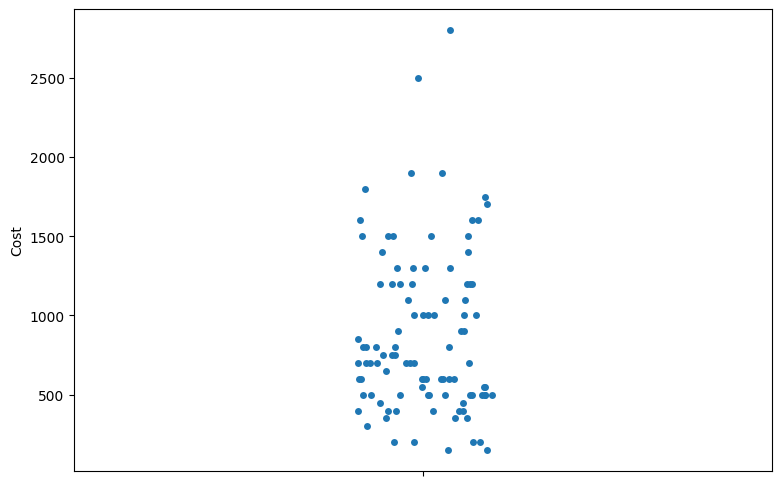

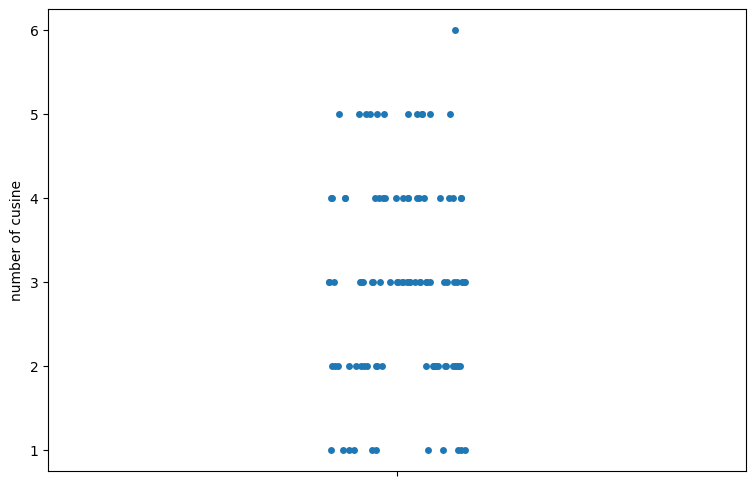

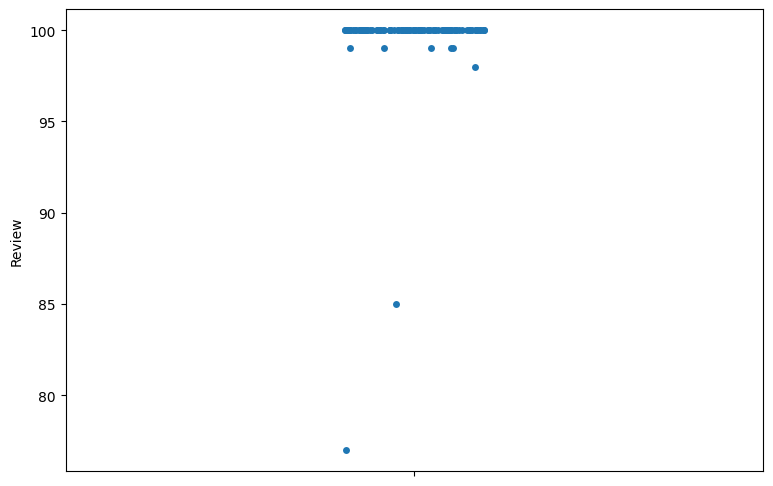

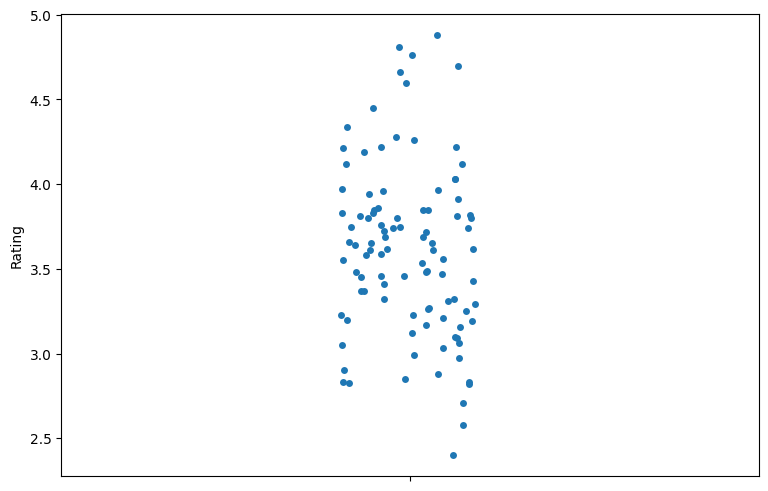

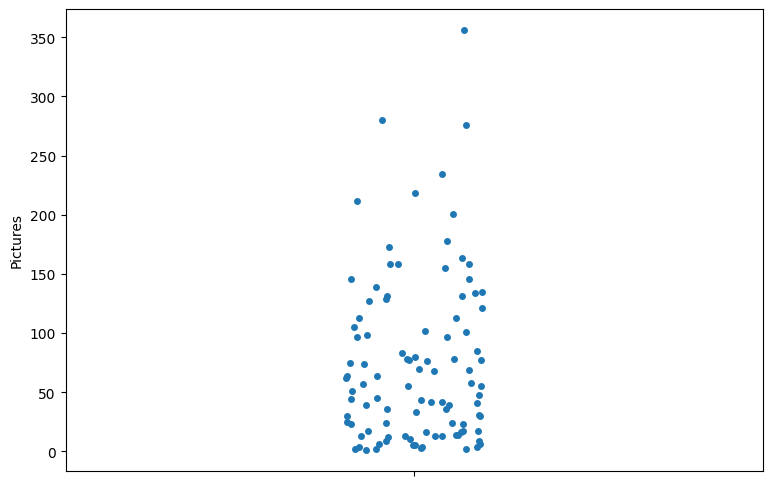

In [871]:
for col in numerical_df.columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(numerical_df[col])

#sns.stripplot(numerical_df['Rating'])

In [872]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [873]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
  numerical_df.loc[numerical_df[feature]<= outlier_treatment(df=numerical_df,feature=feature)[1], feature]=outlier_treatment(df=numerical_df,feature=feature)[1]
  numerical_df.loc[numerical_df[feature]>= outlier_treatment(df=numerical_df,feature=feature)[0], feature]=outlier_treatment(df=numerical_df,feature=feature)[0]

In [874]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-3*IQR
  upper_bridge =df[feature].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [875]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  numerical_df.loc[numerical_df[feature]<= outlier_treatment_skew(df=numerical_df,feature=feature)[1], feature]=outlier_treatment_skew(df=numerical_df,feature=feature)[1]
  numerical_df.loc[numerical_df[feature]>= outlier_treatment_skew(df=numerical_df,feature=feature)[0], feature]=outlier_treatment_skew(df=numerical_df,feature=feature)[0]

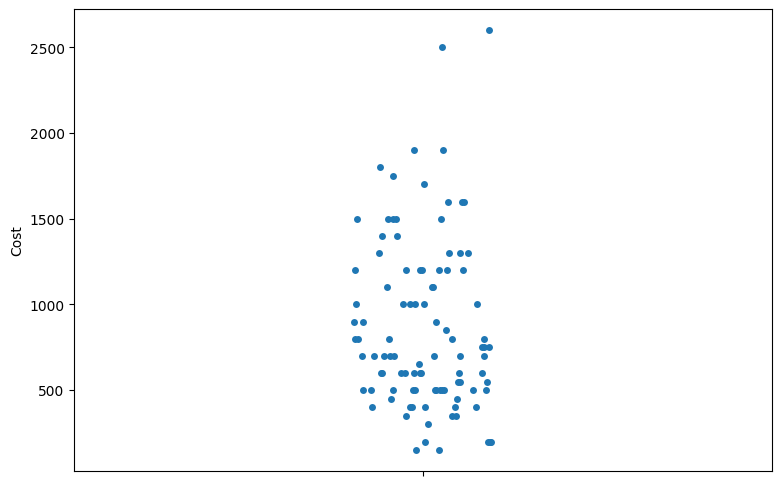

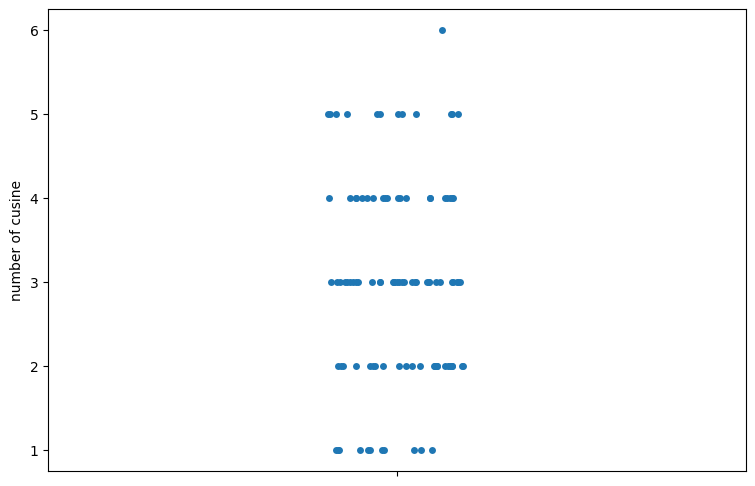

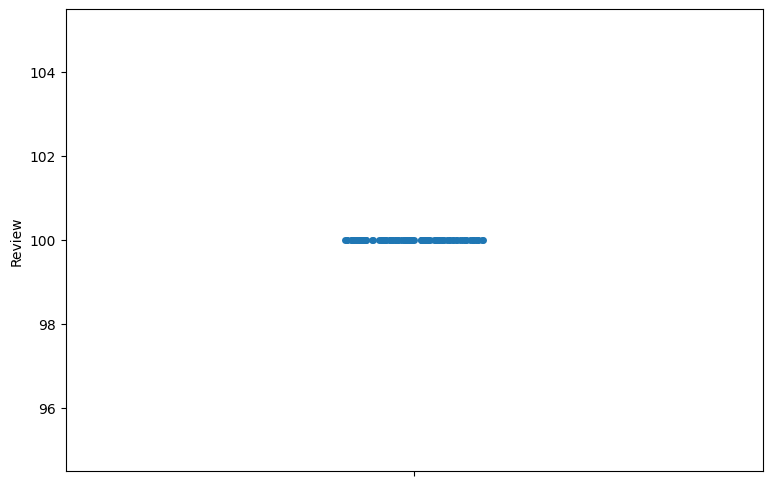

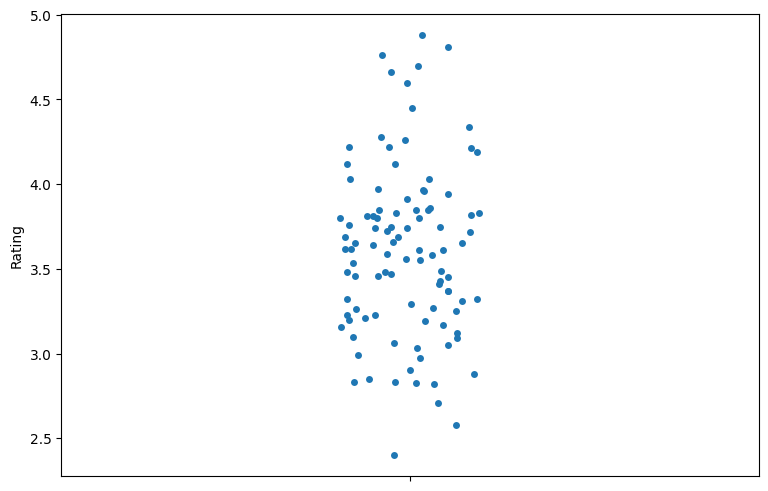

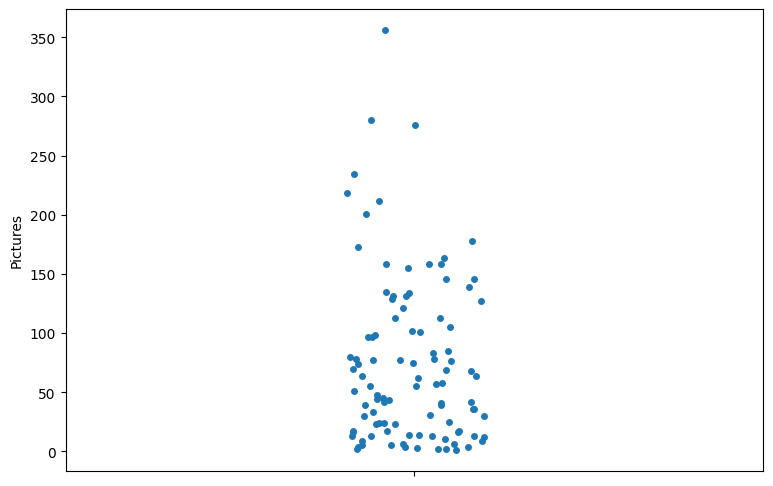

In [876]:
for col in numerical_df.columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(numerical_df[col])

#sns.stripplot(numerical_df['Rating'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

First I have identified numerical columns. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below.  Using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

In a Gaussian distribution while it’s the symmetric curve and outlier are present. Then, we can set the boundary by taking standard deviation into action.

The describe function is used for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


### 3. Categorical Encoding

In [877]:
#merging metadata and rating_df
#metadata=pd.merge(metadata, rating_df, left_index=True, right_index=True)

In [878]:
#Replace False with 0 and True with 1 in cuisine_bool dataset.
cuisine_bool.replace({False: 0, True: 1}, inplace=True)

In [879]:
cuisine_bool

Chinese  Continental  Kebab  European  \
Name                                                                            
Beyond Flavours                               1            1      1         1   
Paradise                                      1            0      0         0   
Flechazo                                      0            0      0         0   
Shah Ghouse Hotel & Restaurant                1            0      0         0   
Over The Moon Brew Company                    1            1      0         0   
...                                         ...          ...    ...       ...   
IndiBlaze                                     0            0      0         0   
Sweet Basket                                  0            0      0         0   
Angaara Counts 3                              1            0      0         0   
Wich Please                                   0            0      0         0   
Republic Of Noodles - Lemon Tree Hotel        1            0      0         0   

                                        South Indian  North Indian  Biryani  \
Name                                                                          
Beyond Flavours                                    1             1        0   
Paradise                                           0             1        1   
Flechazo                                           0             1        0   
Shah Ghouse Hotel & Restaurant                     0             1        1   
Over The Moon Brew Company                         0             1        0   
...                                              ...           ...      ...   
IndiBlaze                                          0             0        0   
Sweet Basket                                       0             0        0   
Angaara Counts 3                                   0             1        1   
Wich Please                                        0             0        0   
Republic Of Noodles - Lemon Tree Hotel             0             0        0   

                                        Asian  Mediterranean  Desserts  ...  \
Name                                                                    ...   
Beyond Flavours                             0              0         0  ...   
Paradise                                    0              0         0  ...   
Flechazo                                    1              1         1  ...   
Shah Ghouse Hotel & Restaurant              0              0         0  ...   
Over The Moon Brew Company                  1              1         0  ...   
...                                       ...            ...       ...  ...   
IndiBlaze                                   0              0         0  ...   
Sweet Basket                                0              0         0  ...   
Angaara Counts 3                            0              0         0  ...   
Wich Please                                 0              0         0  ...   
Republic Of Noodles - Lemon Tree Hotel      1              0         0  ...   

                                        Spanish  Wraps  Thai  Indonesian  \
Name                                                                       
Beyond Flavours                               0      0     0           0   
Paradise                                      0      0     0           0   
Flechazo                                      0      0     0           0   
Shah Ghouse Hotel & Restaurant                0      0     0           0   
Over The Moon Brew Company                    0      0     0           0   
...                                         ...    ...   ...         ...   
IndiBlaze                                     0      0     0           0   
Sweet Basket                                  0      0     0           0   
Angaara Counts 3                              0      0     0           0   
Wich Please                                   0      0     0           0   
Republic Of Noodle

In [880]:
#Replace False with 0 and True with 1 in collections_bool dataset.
collections_bool.replace({False: 0, True: 1}, inplace=True)

In [881]:
collections_bool

Food Hygiene Rated Restaurants in Hyderabad  \
Name                                                                                  
Beyond Flavours                                                                   1   
Paradise                                                                          0   
Flechazo                                                                          0   
Shah Ghouse Hotel & Restaurant                                                    0   
Over The Moon Brew Company                                                        1   
...                                                                             ...   
IndiBlaze                                                                         0   
Sweet Basket                                                                      0   
Angaara Counts 3                                                                  0   
Wich Please                                                                       0   
Republic Of Noodles - Lemon Tree Hotel                                            0   

                                        Corporate Favorites  Great Buffets  \
Name                                                                         
Beyond Flavours                                           1              1   
Paradise                                                  0              0   
Flechazo                                                  0              1   
Shah Ghouse Hotel & Restaurant                            0              0   
Over The Moon Brew Company                                0              0   
...                                                     ...            ...   
IndiBlaze                                                 0              0   
Sweet Basket                                              0              0   
Angaara Counts 3                                          0              0   
Wich Please                                               0              0   
Republic Of Noodles - Lemon Tree Hotel                    0              0   

                                        Top-Rated  Gold Curated  \
Name                                                              
Beyond Flavours                                 1             1   
Paradise                                        0             0   
Flechazo                                        0             0   
Shah Ghouse Hotel & Restaurant                  0             0   
Over The Moon Brew Company                      1             1   
...                                           ...           ...   
IndiBlaze                                       0             0   
Sweet Basket                                    0             0   
Angaara Counts 3                                0             0   
Wich Please                                     0             0   
Republic Of Noodles - Lemon Tree Hotel          0             0   

                                        Live Sports Screenings  \
Name                                                             
Beyond Flavours                                              1   
Paradise                                                     0   
Flechazo                                                     0   
Shah Ghouse Hotel & Restaurant                               0   
Over The Moon Brew Company                                   0   
...                                                        ...   
IndiBlaze                                                    0   
Sweet Basket                                                 0   
Angaara Counts 3                                             0   
Wich Please                                                  0   
Republic Of Noodles - Lemon Tree Hotel                       0   

                                        Hyderabad's Hottest  \
Name                                                          
Beyond Flavours                     

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have replaced the False values with 0 and True values with 1 in the datasets cuisine_bool and collections_bool.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [882]:
sentiment_df=review[['Reviewer','Restaurant','Rating','Review']]

In [883]:
sentiment_df

Reviewer        Restaurant  Rating  \
0        Rusha Chakraborty   Beyond Flavours     5.0   
1     Anusha Tirumalaneedi   Beyond Flavours     5.0   
2          Ashok Shekhawat   Beyond Flavours     5.0   
3           Swapnil Sarkar   Beyond Flavours     5.0   
4                   Dileep   Beyond Flavours     5.0   
...                    ...               ...     ...   
9995      Abhishek Mahajan  Chinese Pavilion     3.0   
9996        Sharad Agrawal  Chinese Pavilion     4.5   
9997             Ramandeep  Chinese Pavilion     1.5   
9998       Nayana Shanbhag  Chinese Pavilion     4.0   
9999      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     The ambience was good, food was quite good . h...  
1     Ambience is too good for a pleasant evening. S...  
2     A must try.. great food great ambience. Thnx f...  
3     Soumen das and Arun was a great guy. Only beca...  
4     Food is good.we ordered Kodi drumsticks and ba...  
...                                                 ...  
9995  Madhumathi Mahajan Well to start with nice cou...  
9996  This place has never disappointed us.. The foo...  
9997  Bad rating is mainly because of "Chicken Bone ...  
9998  I personally love and prefer Chinese Food. Had...  
9999  Checked in here to try some delicious chinese ...  

[9962 rows x 4 columns]

In [884]:
review[review['Review'].isna()]

Empty DataFrame
Columns: [Restaurant, Reviewer, Review, Rating, Metadata, Time, Pictures, Total_Review, Total_Followers]
Index: []

In [885]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [886]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [887]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [888]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     the ambience was good, food was quite good . h...  
1     ambience is too good for a pleasant evening. s...  
2     a must try.. great food great ambience. thnx f...  
3     soumen das and arun was a great guy. only beca...  
4     food is good.we ordered kodi drumsticks and ba...  
...                                                 ...  
9957  madhumathi mahajan well to start with nice cou...  
9958  this place has never disappointed us.. the foo...  
9959  bad rating is mainly because of "chicken bone ...  
9960  i personally love and prefer chinese food. had...  
9961  checked in here to try some delicious chinese ...  

[9962 rows x 5 columns]

#### 3. Removing Punctuations

In [889]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [890]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [891]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     the ambience was good food was quite good  had...  
1     ambience is too good for a pleasant evening se...  
2     a must try great food great ambience thnx for ...  
3     soumen das and arun was a great guy only becau...  
4     food is goodwe ordered kodi drumsticks and bas...  
...                                                 ...  
9957  madhumathi mahajan well to start with nice cou...  
9958  this place has never disappointed us the food ...  
9959  bad rating is mainly because of chicken bone f...  
9960  i personally love and prefer chinese food had ...  
9961  checked in here to try some delicious chinese ...  

[9962 rows x 5 columns]

#### 4. Removing URLs & Removing words and digits contain digits.

In [892]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

#### 5. Removing Stopwords & Removing White spaces

In [893]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [894]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [895]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)
     

In [896]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [897]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     ambience good food quite good saturday lunch c...  
1     ambience good pleasant evening service prompt ...  
2     must try great food great ambience thnx servic...  
3     soumen das arun great guy behavior sincerety g...  
4     food goodwe ordered kodi drumsticks basket mut...  
...                                                 ...  
9957  madhumathi mahajan well start nice courteous s...  
9958  place never disappointed us food courteous sta...  
9959  bad rating mainly chicken bone found veg food ...  
9960  personally love prefer chinese food couple tim...  
9961  checked try delicious chinese food seen nonveg...  

[9962 rows x 5 columns]

#### 6. Rephrase Text

#### 7. Tokenization

In [898]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [899]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     [ambience, good, food, quite, good, saturday, ...  
1     [ambience, good, pleasant, evening, service, p...  
2     [must, try, great, food, great, ambience, thnx...  
3     [soumen, das, arun, great, guy, behavior, sinc...  
4     [food, goodwe, ordered, kodi, drumsticks, bask...  
...                                                 ...  
9957  [madhumathi, mahajan, well, start, nice, court...  
9958  [place, never, disappointed, us, food, courteo...  
9959  [bad, rating, mainly, chicken, bone, found, ve...  
9960  [personally, love, prefer, chinese, food, coup...  
9961  [checked, try, delicious, chinese, food, seen,...  

[9962 rows x 5 columns]

#### 8. Text Normalization

In [900]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [901]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     [ambience, good, food, quite, good, saturday, ...  
1     [ambience, good, pleasant, evening, service, p...  
2     [must, try, great, food, great, ambience, thnx...  
3     [soumen, da, arun, great, guy, behavior, since...  
4     [food, goodwe, ordered, kodi, drumstick, baske...  
...                                                 ...  
9957  [madhumathi, mahajan, well, start, nice, court...  
9958  [place, never, disappointed, u, food, courteou...  
9959  [bad, rating, mainly, chicken, bone, found, ve...  
9960  [personally, love, prefer, chinese, food, coup...  
9961  [checked, try, delicious, chinese, food, seen,...  

[9962 rows x 5 columns]

#### 9. Part of speech tagging

#### 10. Text Vectorization

In [902]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [903]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
#tokens_dict.token2id

In [904]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

doc_index           doc_id     token  bow
0          0  Beyond Flavours      also    1
1          0  Beyond Flavours  ambience    1
2          0  Beyond Flavours    brunch    1
3          0  Beyond Flavours     chill    1
4          0  Beyond Flavours      cost    1

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

Metadata

In [905]:
metadata.shape

(105, 7)

In [906]:
metadata.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'number of cusine'],
      dtype='object')

In [907]:
#merging metadata and cuisine_bool
metadata=pd.merge(metadata, cuisine_bool, left_index=True, right_index=True)

In [908]:
metadata

Name  \
Name                                                                             
Beyond Flavours                                                Beyond Flavours   
Paradise                                                              Paradise   
Flechazo                                                              Flechazo   
Shah Ghouse Hotel & Restaurant                  Shah Ghouse Hotel & Restaurant   
Over The Moon Brew Company                          Over The Moon Brew Company   
...                                                                        ...   
IndiBlaze                                                            IndiBlaze   
Sweet Basket                                                      Sweet Basket   
Angaara Counts 3                                              Angaara Counts 3   
Wich Please                                                        Wich Please   
Republic Of Noodles - Lemon Tree Hotel  Republic Of Noodles - Lemon Tree Hotel   

                                                                                    Links  \
Name                                                                                        
Beyond Flavours                         https://www.zomato.com/hyderabad/beyond-flavou...   
Paradise                                https://www.zomato.com/hyderabad/paradise-gach...   
Flechazo                                https://www.zomato.com/hyderabad/flechazo-gach...   
Shah Ghouse Hotel & Restaurant          https://www.zomato.com/hyderabad/shah-ghouse-h...   
Over The Moon Brew Company              https://www.zomato.com/hyderabad/over-the-moon...   
...                                                                                   ...   
IndiBlaze                               https://www.zomato.com/hyderabad/indiblaze-gac...   
Sweet Basket                            https://www.zomato.com/hyderabad/sweet-basket-...   
Angaara Counts 3                        https://www.zomato.com/hyderabad/angaara-count...   
Wich Please                             https://www.zomato.com/hyderabad/wich-please-1...   
Republic Of Noodles - Lemon Tree Hotel  https://www.zomato.com/hyderabad/republic-of-n...   

                                        Cost  \
Name                                           
Beyond Flavours                          800   
Paradise                                 800   
Flechazo                                1300   
Shah Ghouse Hotel & Restaurant           800   
Over The Moon Brew Company              1200   
...                                      ...   
IndiBlaze                                600   
Sweet Basket                             200   
Angaara Counts 3                         500   
Wich Please                              250   
Republic Of Noodles - Lemon Tree Hotel  1700   

                                                                              Collections  \
Name                                                                                        
Beyond Flavours                         [Food Hygiene Rated Restaurants in Hyderabad, ...   
Paradise                                                            [Hyderabad's Hottest]   
Flechazo                                             [Great Buffets, Hyderabad's Hottest]   
Shah Ghouse Hotel & Restaurant                                   [Late Night Restaurants]   
Over The Moon Brew Company              [Best Bars & Pubs, Food Hygiene Rated Restaura...   
...                                                                                   ...   
IndiBlaze                                                                              []   
Sweet Basket                                                                           []   
Angaara Counts 3                                                                       []   
Wich Please                                                                            []   
Republic Of Noodles - Lemon Tree Hotel                  

In [909]:
#shape after merging cuisine_bool
metadata.shape

(105, 51)

In [910]:
#merging metadata and collection_bool
metadata=pd.merge(metadata, collections_bool, left_index=True, right_index=True)

In [911]:
#shape after merging collections_bool
metadata.shape

(105, 89)

In [912]:
#Adding column rating to the metadata
metadata=pd.merge(metadata,numerical_df['Rating'], left_index=True, right_index=True)

In [913]:
#shape after merging numerical_df['Rating']
metadata.shape

(100, 90)

In [914]:
master_metadata=metadata

In [915]:
metadata=metadata.drop(columns =['Name','Timings','Cuisines','Links','Collections'],axis=1)

In [916]:
metadata.shape

(100, 85)

In [917]:
metadata.head(2)

Cost  number of cusine  Chinese  Continental  Kebab  \
Name                                                                   
Beyond Flavours   800                 6        1            1      1   
Paradise          800                 3        1            0      0   

                 European  South Indian  North Indian  Biryani  Asian  ...  \
Name                                                                   ...   
Beyond Flavours         1             1             1        0      0  ...   
Paradise                0             0             1        1      0  ...   

                 Pan-Asian Delicacies  Terrific Thalis  Sneak Peek Hyderabad  \
Name                                                                           
Beyond Flavours                     0                0                     0   
Paradise                            0                0                     0   

                 Ramzan Mubarak  Best Milkshakes  Top Drinking Destinations  \
Name                                                                          
Beyond Flavours               0                0                          0   
Paradise                      0                0                          0   

                 Best Bakeries  New on Gold  Brilliant Biryanis  Rating  
Name                                                                     
Beyond Flavours              0            0                   0    4.28  
Paradise                     0            0                   0    4.70  

[2 rows x 85 columns]

Review dataframe

In [918]:
review.shape

(9962, 9)

In [919]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Total_Review', 'Total_Followers'],
      dtype='object')

In [920]:
review['Rating'].describe()['75%']

5.0

In [921]:
#Getting IQR of ratings 
Q1_rating=review['Rating'].describe()['25%']
Q3_rating=review['Rating'].describe()['75%']

In [922]:
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x: 1 if (x>=Q3_rating) else (-1 if (x<=Q1_rating) else 0))

In [923]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  sentiment  
0     [ambience, good, food, quite, good, saturday, ...          1  
1     [ambience, good, pleasant, evening, service, p...          1  
2     [must, try, great, food, great, ambience, thnx...          1  
3     [soumen, da, arun, great, guy, behavior, since...          1  
4     [food, goodwe, ordered, kodi, drumstick, baske...          1  
...                                                 ...        ...  
9957  [madhumathi, mahajan, well, start, nice, court...         -1  
9958  [place, never, disappointed, u, food, courteou...          0  
9959  [bad, rating, mainly, chicken, bone, found, ve...         -1  
9960  [personally, love, prefer, chinese, food, coup...          0  
9961  [checked, try, delicious, chinese, food, seen,...          0  

[9962 rows x 6 columns]

In [924]:
#Adding column cost to the review
review=pd.merge(review,numerical_df['Cost'], left_index=True, right_index=True)

#### 2. Feature Selection

In [925]:
metadata.columns

Index(['Cost', 'number of cusine', 'Chinese', 'Continental', 'Kebab',
       'European', 'South Indian', 'North Indian', 'Biryani', 'Asian',
       'Mediterranean', 'Desserts', 'Seafood', 'Beverages', 'Goan',
       'Healthy Food', 'Lebanese', 'American', 'Ice Cream', 'Street Food_x',
       'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger', 'Japanese',
       'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery', 'Juices',
       'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian', 'Food Hygiene Rated Restaurants in Hyderabad',
       'Corporate Favorites', 'Great Buffets', 'Top-Rated', 'Gold Curated',
       'Live Sports Screenings', 'Hyderabad's Hottest',
       'Late Night Restaurants', 'Best Bars & Pubs', 'Sunday Brunches', '',
       'Trending This Week', 'Frozen Delights', 'Street Food_y',
       'Veggie Friendly', 'Pocket Friendly', 'Barbecue & Grill', 'Happy

In [926]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Total_Review', 'Total_Followers', 'Cost'],
      dtype='object')

In [927]:
numerical_df.columns

Index(['Cost', 'number of cusine', 'Review', 'Rating', 'Pictures'], dtype='object')

In [928]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'sentiment'], dtype='object')

In [929]:
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  sentiment  
0     [ambience, good, food, quite, good, saturday, ...          1  
1     [ambience, good, pleasant, evening, service, p...          1  
2     [must, try, great, food, great, ambience, thnx...          1  
3     [soumen, da, arun, great, guy, behavior, since...          1  
4     [food, goodwe, ordered, kodi, drumstick, baske...          1  
...                                                 ...        ...  
9957  [madhumathi, mahajan, well, start, nice, court...         -1  
9958  [place, never, disappointed, u, food, courteou...          0  
9959  [bad, rating, mainly, chicken, bone, found, ve...         -1  
9960  [personally, love, prefer, chinese, food, coup...          0  
9961  [checked, try, delicious, chinese, food, seen,...          0  

[9962 rows x 6 columns]

##### What all feature selection methods have you used  and why?

I will be usign PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 6. Data Transformation

In [930]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in metadata.describe().columns:
  if abs(metadata[i].mean()-metadata[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['number of cusine', 'Kebab', 'European', 'South Indian', 'Mediterranean', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream', 'Street Food_x', 'BBQ', 'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian', 'Food Hygiene Rated Restaurants in Hyderabad', 'Corporate Favorites', 'Top-Rated', 'Gold Curated', 'Live Sports Screenings', "Hyderabad's Hottest", 'Late Night Restaurants', 'Best Bars & Pubs', 'Sunday Brunches', '', 'Trending This Week', 'Frozen Delights', 'Street Food_y', 'Veggie Friendly', 'Pocket Friendly', 'Barbecue & Grill', 'Happy Hours', 'Rooftops', 'Great Italian', 'Gigs and Events', 'Haleem', 'Mandi', 'The ‘Must Visit’ Eateries', 'Fancy and Fun', 'Great Breakfasts', 'Best shawarmas', 'Function Venues', 'Regio

In [931]:

#using log transformation to transform Cost as using capping tends to change median and mean
metadata['Cost'] = np.log1p(metadata['Cost'])


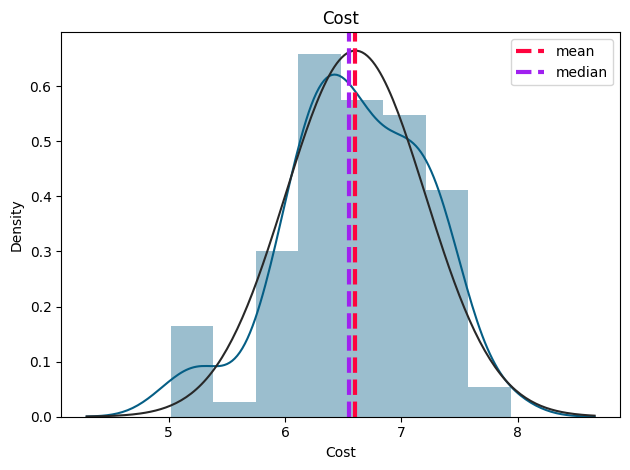

In [932]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(metadata[col], color = '#055E85', fit = norm);
    feature = metadata[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend()
    plt.title(f'{col.title()}');
    plt.tight_layout();
     

### 6. Data Scaling

In [933]:
# Scaling your data
metadata.sample(5)

Cost  number of cusine  Chinese  Continental  \
Name                                                                       
Royal Spicy Restaurant  6.552508                 2        0            0   
NorFest - The Dhaba     6.311735                 1        0            0   
Aromas@11SIX            6.621406                 4        1            0   
Karachi Cafe            6.398595                 3        0            0   
Mohammedia Shawarma     5.017280                 2        0            0   

                        Kebab  European  South Indian  North Indian  Biryani  \
Name                                                                           
Royal Spicy Restaurant      0         0             1             1        0   
NorFest - The Dhaba         0         0             0             1        0   
Aromas@11SIX                0         0             0             1        1   
Karachi Cafe                0         0             0             0        0   
Mohammedia Shawarma         0         0             0             0        0   

                        Asian  ...  Pan-Asian Delicacies  Terrific Thalis  \
Name                           ...                                          
Royal Spicy Restaurant      0  ...                     0                0   
NorFest - The Dhaba         0  ...                     0                0   
Aromas@11SIX                0  ...                     0                0   
Karachi Cafe                0  ...                     0                0   
Mohammedia Shawarma         0  ...                     0                0   

                        Sneak Peek Hyderabad  Ramzan Mubarak  Best Milkshakes  \
Name                                                                            
Royal Spicy Restaurant                     0               0                0   
NorFest - The Dhaba                        0               0                0   
Aromas@11SIX                               0               0                0   
Karachi Cafe                               0               0                0   
Mohammedia Shawarma                        0               0                0   

                        Top Drinking Destinations  Best Bakeries  New on Gold  \
Name                                                                            
Royal Spicy Restaurant                          0              0            0   
NorFest - The Dhaba                             0              0            0   
Aromas@11SIX                                    0              0            0   
Karachi Cafe                                    0              0            0   
Mohammedia Shawarma                             0              0            0   

                        Brilliant Biryanis  Rating  
Name                                                
Royal Spicy Restaurant                   0   3.740  
NorFest - The Dhaba                      0   4.030  
Aromas@11SIX                             0   3.460  
Karachi Cafe                             0   3.715  
Mohammedia Shawarma                      0   2.990  

[5 rows x 85 columns]

In [934]:
#normalizing numerical columns
numerical_cols = ['Cost','number of cusine','Rating']
scaler = StandardScaler()
scaler.fit(metadata[numerical_cols])
scaled_df = metadata.copy()
scaled_df[numerical_cols] = scaler.transform(metadata[numerical_cols])

In [935]:
scaled_df

Cost  number of cusine  Chinese  \
Name                                                                   
Beyond Flavours                  0.135688          2.483145        1   
Paradise                         0.135688         -0.008305        1   
Flechazo                         0.943498          0.822179        0   
Shah Ghouse Hotel & Restaurant   0.135688          1.652662        1   
Over The Moon Brew Company       0.810294          1.652662        1   
...                                   ...               ...      ...   
Desi Bytes                      -1.016667         -0.838788        1   
Hyderabadi Daawat               -0.342752         -0.008305        1   
Zega - Sheraton Hyderabad Hotel  1.438240         -0.838788        0   
Triptify                        -1.016667         -1.669272        0   
Chinese Pavilion                 0.506916         -0.838788        1   

                                 Continental  Kebab  European  South Indian  \
Name                                                                          
Beyond Flavours                            1      1         1             1   
Paradise                                   0      0         0             0   
Flechazo                                   0      0         0             0   
Shah Ghouse Hotel & Restaurant             0      0         0             0   
Over The Moon Brew Company                 1      0         0             0   
...                                      ...    ...       ...           ...   
Desi Bytes                                 0      0         0             0   
Hyderabadi Daawat                          0      0         0             0   
Zega - Sheraton Hyderabad Hotel            0      0         0             0   
Triptify                                   0      0         0             0   
Chinese Pavilion                           0      0         0             0   

                                 North Indian  Biryani  Asian  ...  \
Name                                                           ...   
Beyond Flavours                             1        0      0  ...   
Paradise                                    1        1      0  ...   
Flechazo                                    1        0      1  ...   
Shah Ghouse Hotel & Restaurant              1        1      0  ...   
Over The Moon Brew Company                  1        0      1  ...   
...                                       ...      ...    ...  ...   
Desi Bytes                                  1        0      0  ...   
Hyderabadi Daawat                           0        0      0  ...   
Zega - Sheraton Hyderabad Hotel             0        0      1  ...   
Triptify                                    1        0      0  ...   
Chinese Pavilion                            0        0      0  ...   

                                 Pan-Asian Delicacies  Terrific Thalis  \
Name                                                                     
Beyond Flavours                                     0                0   
Paradise                                            0                0   
Flechazo                                            0                0   
Shah Ghouse Hotel & Restaurant                      0                0   
Over The Moon Brew Company                          0                0   
...                                               ...              ...   
Desi Bytes                                          0                0   
Hyderabadi Daawat                                   0                0   
Zega - Sheraton Hyderabad Hotel                     0                0   
Triptify                                            0                0   
Chinese Pavilion                                    0                0   

                                 Sneak Peek Hyderabad  Ramzan Mubarak  \
Name                                                                    
Beyond Flavours                                     

### 8. Dimesionality Reduction

In [936]:
#principal component analysis
from sklearn.decomposition import PCA


In [937]:
# Dimensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
#scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

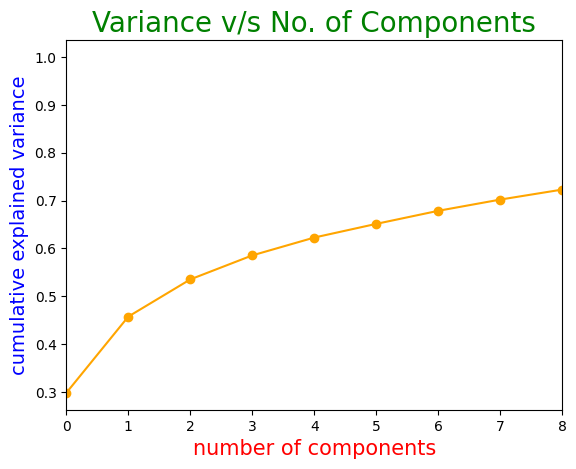

In [938]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [939]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.29812523 0.15940089 0.07772847]
Cumulative variance explained by 3 principal components: 53.53%


In [940]:

#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 85)
transformed shape: (100, 3)


### 10. Data Splitting

In [941]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['sentiment']

In [942]:
sentiment_df.shape

(9962, 6)

In [943]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7969, 17328)
Number transactions y_train dataset:  (7969,)
Number transactions X_test dataset:  (1993, 17328)
Number transactions y_test dataset:  (1993,)


### 8. Handling Imbalanced Dataset

In [944]:
#getting the value count for target class
vc = sentiment_df.sentiment.value_counts().reset_index().rename(columns = 
            {'index':'sentiment','sentiment':'Count'})

In [945]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class_first = vc.Count[1]
minority_class_second = vc.Count[2]

In [946]:
#calculating cir value for checking class imbalance
CIR_1 = majority_class / minority_class_first
CIR_2 = majority_class / minority_class_second

In [947]:
CIR_1

1.0527472527472528

In [948]:
CIR_2

1.5389558232931726

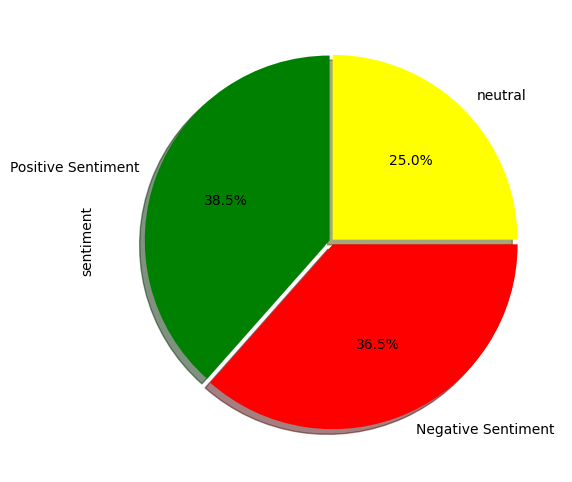

In [949]:
# Dependant Variable Column Visualization
sentiment_df['sentiment'].value_counts().plot(kind='pie',
                               figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment','neutral'],
                               colors=['Green','Red','Yellow'],
                               explode=[0.01,0.02,0.01]
                              )
plt.show()
     

##### Do you think the dataset is imbalanced? Explain Why.

CIR stands for Class Imbalance Ratio, which is a measure of the imbalance between the number of instances in each class in a dataset.

To balance a dataset with three categories (positive, negative, and neutral), you can calculate the CIR for each class as follows:

CIR = (Number of instances in the majority class) / (Number of instances in the minority class)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

There are three categories in which sentiment is classified. There is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class(positive sentiment) and 40 is the minority class of Neutral sentiment. Even the CIR score suggest that majority class is 1.53 times greater than minority class.However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance. 

There is no imbalance in dataset for majority class (Positive sentiment) and minority class (negative sentiment).



## ***7. ML Model Implementation***

### ML Model - 1 - **Clustering**